In [1]:
# Importing modules
import pandas as pd
import numpy as np
import seaborn as sns
import json
import matplotlib.pyplot as plt
import os
from datetime import datetime
from dateutil.parser import parse
from datetime import timedelta
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox
import matplotlib.image as mpimg
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [2]:
sherdog_data = pd.read_csv('/Users/Archi/OneDrive/Documents/data/masterdataframe.csv')
sherdog_data[0:10]

,date,fight_url,event_url,result,fighter,opponent,division,stance,dob,method,...,recent_avg_clinch_strikes_attempts_per_min,precomp_recent_avg_clinch_strikes_attempts_per_min,avg_ground_strikes_landed_per_min,precomp_avg_ground_strikes_landed_per_min,recent_avg_ground_strikes_landed_per_min,precomp_recent_avg_ground_strikes_landed_per_min,avg_ground_strikes_attempts_per_min,precomp_avg_ground_strikes_attempts_per_min,recent_avg_ground_strikes_attempts_per_min,precomp_recent_avg_ground_strikes_attempts_per_min
0,1994-03-11,http://ufcstats.com/fight-details/4acab67848e7...,http://ufcstats.com/event-details/a6a9ab5a824e...,0,Sean Daugherty,Scott Morris,Open Weight,NaN,1975-12-04,SUB,...,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN
1,1994-03-11,http://ufcstats.com/fight-details/4acab67848e7...,http://ufcstats.com/event-details/a6a9ab5a824e...,1,Scott Morris,Sean Daugherty,Open Weight,Orthodox,NaN,SUB,...,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN
2,1994-03-11,http://ufcstats.com/fight-details/4b9ae533ccb3...,http://ufcstats.com/event-details/a6a9ab5a824e...,0,Ray Wizard,Patrick Smith,Open Weight,NaN,NaN,SUB,...,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN
3,1994-03-11,http://ufcstats.com/fight-details/4b9ae533ccb3...,http://ufcstats.com/event-details/a6a9ab5a824e...,1,Patrick Smith,Ray Wizard,Open Weight,Orthodox,1963-08-28,SUB,...,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN
4,1994-03-11,http://ufcstats.com/fight-details/ccee020be2e8...,http://ufcstats.com/event-details/a6a9ab5a824e...,0,David Levicki,Johnny Rhodes,Open Weight,NaN,NaN,KO/TKO,...,NaN,NaN,0.081855,NaN,NaN,NaN,0.081855,NaN,NaN,NaN
5,1994-03-11,http://ufcstats.com/fight-details/ccee020be2e8...,http://ufcstats.com/event-details/a6a9ab5a824e...,1,Johnny Rhodes,David Levicki,Open Weight,Orthodox,NaN,KO/TKO,...,NaN,NaN,0.736698,NaN,NaN,NaN,1.227831,NaN,NaN,NaN
6,1994-03-11,http://ufcstats.com/fight-details/d917c8c7461b...,http://ufcstats.com/event-details/a6a9ab5a824e...,0,Thaddeus Luster,Frank Hamaker,Open Weight,NaN,NaN,SUB,...,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN
7,1994-03-11,http://ufcstats.com/fight-details/d917c8c7461b...,http://ufcstats.com/event-details/a6a9ab5a824e...,1,Frank Hamaker,Thaddeus Luster,Open Weight,NaN,NaN,SUB,...,NaN,NaN,0.205479,NaN,NaN,NaN,0.410959,NaN,NaN,NaN
8,1994-03-11,http://ufcstats.com/fight-details/3b020d4914b4...,http://ufcstats.com/event-details/a6a9ab5a824e...,0,Robert Lucarelli,Orlando Wiet,Open Weight,NaN,NaN,KO/TKO,...,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN
9,1994-03-11,http://ufcstats.com/fight-details/3b020d4914b4...,http://ufcstats.com/event-details/a6a9ab5a824e...,1,Orlando Wiet,Robert Lucarelli,Open Weight,Southpaw,NaN,KO/TKO,...,NaN,NaN,2.470588,NaN,NaN,NaN,3.176471,NaN,NaN,NaN


In [3]:
sherdog_data.isna().sum()[10:]


total_comp_time                                          0
round                                                    0
time                                                     0
fighter_url                                              0
opponent_url                                             0
                                                      ... 
precomp_recent_avg_ground_strikes_landed_per_min      5633
avg_ground_strikes_attempts_per_min                      0
precomp_avg_ground_strikes_attempts_per_min           2261
recent_avg_ground_strikes_attempts_per_min            4143
precomp_recent_avg_ground_strikes_attempts_per_min    5633
Length: 520, dtype: int64

In [4]:
sherdog_data.columns

Index(['date', 'fight_url', 'event_url', 'result', 'fighter', 'opponent',
       'division', 'stance', 'dob', 'method',
       ...
       'recent_avg_clinch_strikes_attempts_per_min',
       'precomp_recent_avg_clinch_strikes_attempts_per_min',
       'avg_ground_strikes_landed_per_min',
       'precomp_avg_ground_strikes_landed_per_min',
       'recent_avg_ground_strikes_landed_per_min',
       'precomp_recent_avg_ground_strikes_landed_per_min',
       'avg_ground_strikes_attempts_per_min',
       'precomp_avg_ground_strikes_attempts_per_min',
       'recent_avg_ground_strikes_attempts_per_min',
       'precomp_recent_avg_ground_strikes_attempts_per_min'],
      dtype='object', length=530)

In [5]:
sherdog_data['fighter'] == 'Mark hunt'

0        False
1        False
2        False
3        False
4        False
         ...  
13317    False
13318    False
13319    False
13320    False
13321    False
Name: fighter, Length: 13322, dtype: bool

In [6]:
sherdog_data.loc[sherdog_data['fighter'] == 'Mark Hunt']

,date,fight_url,event_url,result,fighter,opponent,division,stance,dob,method,...,recent_avg_clinch_strikes_attempts_per_min,precomp_recent_avg_clinch_strikes_attempts_per_min,avg_ground_strikes_landed_per_min,precomp_avg_ground_strikes_landed_per_min,recent_avg_ground_strikes_landed_per_min,precomp_recent_avg_ground_strikes_landed_per_min,avg_ground_strikes_attempts_per_min,precomp_avg_ground_strikes_attempts_per_min,recent_avg_ground_strikes_attempts_per_min,precomp_recent_avg_ground_strikes_attempts_per_min
2844,2010-09-25,http://ufcstats.com/fight-details/bd057764cb51...,http://ufcstats.com/event-details/ad32471f01e7...,0,Mark Hunt,Sean McCorkle,Heavyweight,Orthodox,1974-03-23,SUB,...,NaN,NaN,0.952381,NaN,NaN,NaN,0.952381,NaN,NaN,NaN
3063,2011-02-26,http://ufcstats.com/fight-details/6ac1478baedd...,http://ufcstats.com/event-details/88a9bc81271c...,1,Mark Hunt,Chris Tuchscherer,Heavyweight,Orthodox,1974-03-23,KO/TKO,...,NaN,NaN,0.476190,0.952381,NaN,NaN,0.476190,0.952381,NaN,NaN
3397,2011-09-24,http://ufcstats.com/fight-details/cca58aece281...,http://ufcstats.com/event-details/73ef22f25d0f...,1,Mark Hunt,Ben Rothwell,Heavyweight,Orthodox,1974-03-23,U-DEC,...,0.166417,NaN,0.739683,0.476190,0.739683,NaN,0.895238,0.476190,0.895238,NaN
3713,2012-02-25,http://ufcstats.com/fight-details/319053a9de63...,http://ufcstats.com/event-details/8377c5572cb3...,1,Mark Hunt,Cheick Kongo,Heavyweight,Orthodox,1974-03-23,KO/TKO,...,0.166417,0.166417,0.669266,0.739683,0.574894,0.739683,0.785932,0.895238,0.730450,0.895238
4409,2013-03-02,http://ufcstats.com/fight-details/c996b2ff10a9...,http://ufcstats.com/event-details/83c6c3e0f8bd...,1,Mark Hunt,Stefan Struve,Heavyweight,Orthodox,1974-03-23,KO/TKO,...,0.066667,0.166417,0.569503,0.669266,0.631712,0.574894,0.713973,0.785932,0.872495,0.730450
4578,2013-05-25,http://ufcstats.com/fight-details/19d6c7f5263c...,http://ufcstats.com/event-details/3c241737a606...,0,Mark Hunt,Junior Dos Santos,Heavyweight,Orthodox,1974-03-23,KO/TKO,...,0.000000,0.066667,0.474586,0.569503,0.209490,0.631712,0.594978,0.713973,0.294717,0.872495
5003,2013-12-06,http://ufcstats.com/fight-details/fe52c91f751e...,http://ufcstats.com/event-details/ee457ef1e1c3...,0,Mark Hunt,Antonio Silva,Heavyweight,Orthodox,1974-03-23,DRAW,...,0.040000,0.000000,0.463931,0.474586,0.190152,0.209490,0.572838,0.594978,0.288712,0.294717
5783,2014-09-20,http://ufcstats.com/fight-details/ef3c1a2ac651...,http://ufcstats.com/event-details/2dea80c06984...,1,Mark Hunt,Roy Nelson,Heavyweight,Orthodox,1974-03-23,KO/TKO,...,0.290000,0.040000,0.405940,0.463931,0.133333,0.190152,0.501233,0.572838,0.146667,0.288712
5936,2014-11-15,http://ufcstats.com/fight-details/03a200326e56...,http://ufcstats.com/event-details/59851163aaf1...,0,Mark Hunt,Fabricio Werdum,Heavyweight,Orthodox,1974-03-23,KO/TKO,...,0.424228,0.290000,0.390664,0.405940,0.222819,0.133333,0.475369,0.501233,0.236152,0.146667
6370,2015-05-09,http://ufcstats.com/fight-details/57b986d06bde...,http://ufcstats.com/event-details/8a1b4330c795...,0,Mark Hunt,Stipe Miocic,Heavyweight,Orthodox,1974-03-23,KO/TKO,...,0.472012,0.424228,0.351597,0.390664,0.089485,0.222819,0.427832,0.475369,0.089485,0.236152


In [7]:
#if sherdog_data.loc[sherdog_data['method'] == 'DRAW']:
 #   sherdog_data['result'].replace((0,1), 2, inplace=True)

#sherdog_data[['method'] == 'DRAW'] = sherdog_data['result'].apply(lambda x: 2)
sherdog_data.loc[sherdog_data['method'] =='DRAW', 'result'] = 'draw' 

In [8]:
grouped_fighter_data = sherdog_data.groupby('fighter').mean()

sherdog_data.isna().sum()[15:]

referee                                                 64
time_format                                              0
reach                                                 1283
height                                                  14
age                                                    235
                                                      ... 
precomp_recent_avg_ground_strikes_landed_per_min      5633
avg_ground_strikes_attempts_per_min                      0
precomp_avg_ground_strikes_attempts_per_min           2261
recent_avg_ground_strikes_attempts_per_min            4143
precomp_recent_avg_ground_strikes_attempts_per_min    5633
Length: 515, dtype: int64

In [9]:
sherdog_data.isna().sum()

date                                                     0
fight_url                                                0
event_url                                                0
result                                                   0
fighter                                                  0
                                                      ... 
precomp_recent_avg_ground_strikes_landed_per_min      5633
avg_ground_strikes_attempts_per_min                      0
precomp_avg_ground_strikes_attempts_per_min           2261
recent_avg_ground_strikes_attempts_per_min            4143
precomp_recent_avg_ground_strikes_attempts_per_min    5633
Length: 530, dtype: int64

In [10]:
null_columns = sherdog_data.loc[:, sherdog_data.isna().any()]

In [11]:
null_columns.isna().sum()

stance                                                  96
dob                                                    235
referee                                                 64
reach                                                 1283
height                                                  14
                                                      ... 
recent_avg_ground_strikes_landed_per_min              4143
precomp_recent_avg_ground_strikes_landed_per_min      5633
precomp_avg_ground_strikes_attempts_per_min           2261
recent_avg_ground_strikes_attempts_per_min            4143
precomp_recent_avg_ground_strikes_attempts_per_min    5633
Length: 318, dtype: int64

In [12]:
sherdog_data['result'].value_counts()

0       6543
1       6543
draw     236
Name: result, dtype: int64

In [13]:
sherdog_data['method'].value_counts()

U-DEC     4666
KO/TKO    4386
SUB       2644
S-DEC     1254
DRAW       236
M-DEC       96
DQ          40
Name: method, dtype: int64

In [14]:
sherdog_data.loc[sherdog_data['method'] =='DQ', 'result'] = 'DQ' 

In [15]:
sherdog_data['result'].value_counts()

0       6523
1       6523
draw     236
DQ        40
Name: result, dtype: int64

In [16]:
sherdog_data.loc[sherdog_data['result'] == 1, 'result'] = 'win' 

In [17]:
sherdog_data.loc[sherdog_data['result'] ==0, 'result'] = 'loss' 

In [18]:
sherdog_data['result'].value_counts()

loss    6523
win     6523
draw     236
DQ        40
Name: result, dtype: int64

In [19]:
# Creating data frame copy reduced to essential columns.
#sherdog_selected_data = sherdog_data[['fighter', 'result', 'date']].copy()

In [20]:
sherdog_data['result'].value_counts()

loss    6523
win     6523
draw     236
DQ        40
Name: result, dtype: int64

In [21]:
sherdog_data[sherdog_data['result'].isna()]

,date,fight_url,event_url,result,fighter,opponent,division,stance,dob,method,...,recent_avg_clinch_strikes_attempts_per_min,precomp_recent_avg_clinch_strikes_attempts_per_min,avg_ground_strikes_landed_per_min,precomp_avg_ground_strikes_landed_per_min,recent_avg_ground_strikes_landed_per_min,precomp_recent_avg_ground_strikes_landed_per_min,avg_ground_strikes_attempts_per_min,precomp_avg_ground_strikes_attempts_per_min,recent_avg_ground_strikes_attempts_per_min,precomp_recent_avg_ground_strikes_attempts_per_min


In [22]:
sherdog_data[sherdog_data['date'].isna()]

,date,fight_url,event_url,result,fighter,opponent,division,stance,dob,method,...,recent_avg_clinch_strikes_attempts_per_min,precomp_recent_avg_clinch_strikes_attempts_per_min,avg_ground_strikes_landed_per_min,precomp_avg_ground_strikes_landed_per_min,recent_avg_ground_strikes_landed_per_min,precomp_recent_avg_ground_strikes_landed_per_min,avg_ground_strikes_attempts_per_min,precomp_avg_ground_strikes_attempts_per_min,recent_avg_ground_strikes_attempts_per_min,precomp_recent_avg_ground_strikes_attempts_per_min


In [23]:
sherdog_data =  sherdog_data.sort_values(by = ['fighter', 'date'], ascending = [True, False], na_position = 'first') .reset_index(drop=True)

In [24]:
converted_dates = []
for i in range(len(sherdog_data['date'])):
    converted_dates.append(parse(sherdog_data['date'][i]))

In [25]:
sherdog_data['date'] = converted_dates

In [26]:
# Creating time intervals between fights for each fighter.
intervals = []
for i in range(len(sherdog_data['fighter']) - 1):
    if sherdog_data['fighter'][i] == sherdog_data['fighter'][i + 1]:
        intervals.append(sherdog_data['date'][i] - sherdog_data['date'][i + 1])
        intervals[i] = intervals[i].days
    else:
        intervals.append(0)
intervals.append(0)   # appending last interval (0) to the last fight in database.

In [27]:
intervals

[0,
 0,
 371,
 0,
 0,
 2153,
 91,
 0,
 672,
 483,
 196,
 98,
 154,
 112,
 1034,
 1347,
 0,
 111,
 154,
 0,
 86,
 147,
 130,
 98,
 98,
 126,
 154,
 159,
 135,
 150,
 0,
 0,
 175,
 133,
 154,
 122,
 676,
 231,
 49,
 188,
 190,
 0,
 0,
 315,
 251,
 148,
 56,
 336,
 308,
 49,
 108,
 95,
 168,
 0,
 0,
 979,
 0,
 504,
 0,
 0,
 287,
 392,
 251,
 0,
 203,
 147,
 0,
 0,
 196,
 0,
 0,
 210,
 119,
 126,
 140,
 0,
 336,
 371,
 223,
 231,
 162,
 77,
 0,
 0,
 658,
 546,
 258,
 0,
 182,
 134,
 0,
 238,
 119,
 119,
 0,
 105,
 336,
 0,
 112,
 171,
 137,
 238,
 189,
 0,
 763,
 154,
 140,
 252,
 350,
 749,
 63,
 85,
 63,
 104,
 112,
 98,
 56,
 456,
 0,
 126,
 217,
 280,
 0,
 119,
 238,
 231,
 497,
 147,
 154,
 175,
 122,
 151,
 182,
 147,
 49,
 115,
 109,
 0,
 588,
 413,
 203,
 140,
 91,
 163,
 110,
 168,
 80,
 137,
 112,
 84,
 0,
 435,
 0,
 343,
 266,
 707,
 245,
 497,
 189,
 273,
 504,
 115,
 0,
 210,
 350,
 287,
 112,
 0,
 0,
 231,
 0,
 77,
 146,
 134,
 105,
 63,
 0,
 153,
 127,
 91,
 252,
 112,
 147,

In [28]:
sherdog_data['Time_interval'] = intervals

In [29]:
sherdog_data[0:10]

,date,fight_url,event_url,result,fighter,opponent,division,stance,dob,method,...,precomp_recent_avg_clinch_strikes_attempts_per_min,avg_ground_strikes_landed_per_min,precomp_avg_ground_strikes_landed_per_min,recent_avg_ground_strikes_landed_per_min,precomp_recent_avg_ground_strikes_landed_per_min,avg_ground_strikes_attempts_per_min,precomp_avg_ground_strikes_attempts_per_min,recent_avg_ground_strikes_attempts_per_min,precomp_recent_avg_ground_strikes_attempts_per_min,Time_interval
0,2022-02-12,http://ufcstats.com/fight-details/c16bda754818...,http://ufcstats.com/event-details/cbb682f5fcc4...,loss,AJ Dobson,Jacob Malkoun,Middleweight,Orthodox,1992-01-18,U-DEC,...,NaN,0.200000,NaN,NaN,NaN,0.200000,NaN,NaN,NaN,0
1,2022-03-12,http://ufcstats.com/fight-details/3b06c512abfa...,http://ufcstats.com/event-details/1f9344211ca7...,loss,AJ Fletcher,Matthew Semelsberger,Welterweight,Switch,1997-02-18,U-DEC,...,NaN,0.266667,NaN,NaN,NaN,0.333333,NaN,NaN,NaN,0
2,2021-03-06,http://ufcstats.com/fight-details/e2abba69c337...,http://ufcstats.com/event-details/6e2b1d631832...,loss,Aalon Cruz,Uros Medic,Lightweight,Switch,1989-09-20,KO/TKO,...,NaN,0.000000,0.000000,NaN,NaN,0.000000,0.000000,NaN,NaN,371
3,2020-02-29,http://ufcstats.com/fight-details/0bcb04163f8d...,http://ufcstats.com/event-details/fc9a9559a05f...,loss,Aalon Cruz,Spike Carlyle,Featherweight,Switch,1989-09-20,KO/TKO,...,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0
4,2000-11-17,http://ufcstats.com/fight-details/91cef206019c...,http://ufcstats.com/event-details/da6dfd09cca1...,loss,Aaron Brink,Andrei Arlovski,Heavyweight,Orthodox,1974-11-12,SUB,...,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0
5,2020-07-15,http://ufcstats.com/fight-details/f3c42ce9fad5...,http://ufcstats.com/event-details/18f5669a92e9...,loss,Aaron Phillips,Jack Shore,Bantamweight,Southpaw,1989-08-05,SUB,...,NaN,0.288889,0.433333,0.288889,NaN,0.422222,0.633333,0.422222,NaN,2153
6,2014-08-23,http://ufcstats.com/fight-details/b2867869d4eb...,http://ufcstats.com/event-details/063649e21bc9...,loss,Aaron Phillips,Matt Hobar,Bantamweight,Southpaw,1989-08-05,U-DEC,...,NaN,0.433333,0.400000,NaN,NaN,0.633333,0.533333,NaN,NaN,91
7,2014-05-24,http://ufcstats.com/fight-details/8d98ccae1057...,http://ufcstats.com/event-details/9ca265dfe832...,loss,Aaron Phillips,Sam Sicilia,Featherweight,Southpaw,1989-08-05,U-DEC,...,NaN,0.400000,NaN,NaN,NaN,0.533333,NaN,NaN,NaN,0
8,2013-07-27,http://ufcstats.com/fight-details/b616969d55fb...,http://ufcstats.com/event-details/5330fe7e4c3a...,loss,Aaron Riley,Justin Salas,Lightweight,Southpaw,1980-12-09,S-DEC,...,1.045060,0.177778,0.200000,0.066667,0.066667,0.237037,0.266667,0.088889,0.088889,672
9,2011-09-24,http://ufcstats.com/fight-details/3f7c7917a57d...,http://ufcstats.com/event-details/73ef22f25d0f...,loss,Aaron Riley,Tony Ferguson,Lightweight,Southpaw,1980-12-09,KO/TKO,...,1.822837,0.200000,0.228571,0.066667,0.288889,0.266667,0.304762,0.088889,0.377778,483


In [30]:
sherdog_data['Time_interval'].value_counts()

0       2342
133      360
140      352
126      348
154      324
        ... 
1716       1
1639       1
1142       1
17         1
1211       1
Name: Time_interval, Length: 693, dtype: int64

In [31]:
sherdog_data.describe()

,total_comp_time,round,reach,height,age,knockdowns,sub_attempts,reversals,control,takedowns_landed,...,precomp_recent_avg_clinch_strikes_attempts_per_min,avg_ground_strikes_landed_per_min,precomp_avg_ground_strikes_landed_per_min,recent_avg_ground_strikes_landed_per_min,precomp_recent_avg_ground_strikes_landed_per_min,avg_ground_strikes_attempts_per_min,precomp_avg_ground_strikes_attempts_per_min,recent_avg_ground_strikes_attempts_per_min,precomp_recent_avg_ground_strikes_attempts_per_min,Time_interval
count,13322.000000,13322.000000,12039.000000,13308.000000,13087.000000,13322.000000,13322.000000,13322.000000,13322.000000,13322.000000,...,7689.000000,13322.000000,11061.000000,9179.000000,7689.000000,13322.000000,11061.000000,9179.000000,7689.000000,13322.000000
mean,628.426813,2.330431,72.136307,70.383228,37.109345,0.215283,0.402792,0.136991,131.914953,1.064930,...,0.833145,0.909553,0.976845,0.802686,0.858894,1.295839,1.390631,1.127832,1.206472,178.567858
std,365.103370,1.013957,4.176705,3.482012,6.217236,0.493830,0.852478,0.423131,174.784787,1.682582,...,0.972702,1.587399,1.687217,1.220934,1.273812,2.073595,2.196934,1.617614,1.683694,218.240995
min,5.000000,1.000000,58.000000,60.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,272.000000,1.000000,70.000000,68.000000,33.000000,0.000000,0.000000,0.000000,5.000000,0.000000,...,0.288889,0.200000,0.233333,0.142540,0.167901,0.300000,0.345762,0.214003,0.244444,84.000000
50%,794.000000,3.000000,72.000000,71.000000,37.000000,0.000000,0.000000,0.000000,57.000000,0.000000,...,0.587569,0.535997,0.592045,0.422222,0.466667,0.796219,0.867907,0.618557,0.668380,147.000000
75%,900.000000,3.000000,75.000000,73.000000,41.000000,0.000000,1.000000,0.000000,195.000000,2.000000,...,1.045211,1.078072,1.153730,0.978280,1.047863,1.570326,1.679185,1.394168,1.510555,217.000000
max,2160.000000,5.000000,84.000000,83.000000,79.000000,5.000000,10.000000,5.000000,1342.000000,21.000000,...,16.196825,48.000000,48.000000,16.170940,16.170940,51.428571,51.428571,23.593461,23.593461,4180.000000


In [32]:
# Assigning a mean, median and mode to variables.
sher_mean = sherdog_data['Time_interval'].mean()
sher_med = sherdog_data['Time_interval'].median()
# Slightly moving mode for the sake of visualization.
sher_mode = sherdog_data['Time_interval'].mode()

In [33]:
sher_mode

0    0
Name: Time_interval, dtype: int64

In [34]:
sher_mode = 5
#for visualization sake

In [35]:
# Counting number of values in the 'Time_interval' column.
len(sherdog_data['Time_interval'].value_counts())

693

c:\Users\Archi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


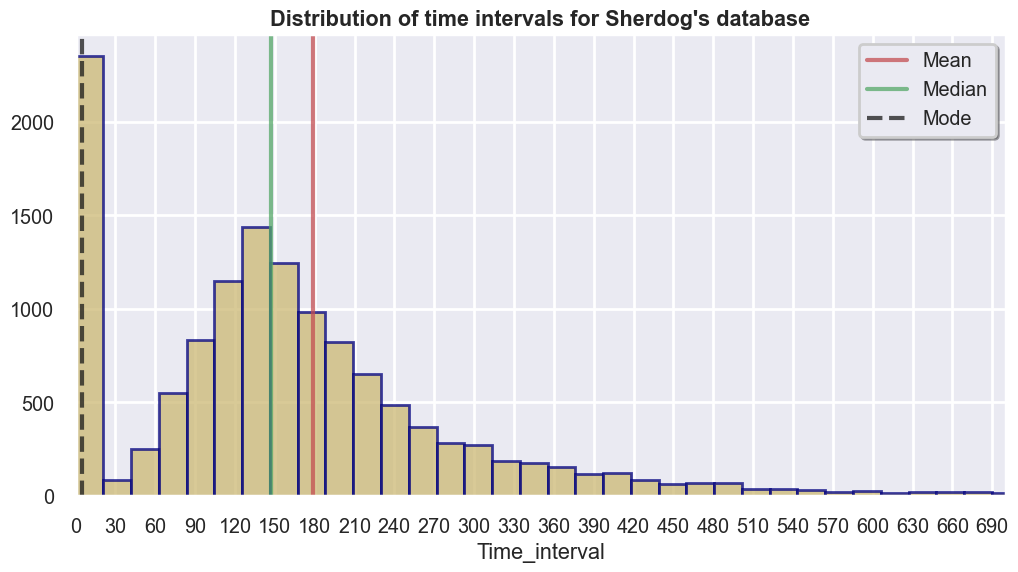

In [36]:
# Plotting data distribution.
plt.rcdefaults()
    
plt.figure(figsize=(12,6), dpi= 100)
sns.set(style='darkgrid')
sns.set_context('poster', font_scale = 0.65)
ax = sns.distplot(sherdog_data['Time_interval'], kde=False, color='y', bins=200,
                  hist_kws=dict(edgecolor='navy', alpha=0.75))
ax.set_xlim(0, 700)
ax.xaxis.set_major_locator(plt.MaxNLocator(25))

ax.axvline(sher_mean, color='r', linestyle='solid', alpha=0.75)
ax.axvline(sher_med, color='g', linestyle='solid', alpha=0.75)
ax.axvline(sher_mode, color='k', linestyle='dashed', alpha=0.75)
plt.title("Distribution of time intervals for Sherdog's database", fontweight='bold')
plt.legend({'Mean':sher_mean, 'Median':sher_med, 'Mode':sher_mode}, frameon=True, shadow=True)
plt.show()

In [37]:
# Showing 15 most frequent time intervals in the database.
sherdog_data['Time_interval'].value_counts().nlargest(15)

0      2342
133     360
140     352
126     348
154     324
147     320
119     300
161     278
189     271
112     268
182     260
98      257
175     250
105     249
168     239
Name: Time_interval, dtype: int64

In [38]:
# Preparing buckets and labels for each category and assigning them to 'cats' variable.
bins = [0, 1, 91, 121, 183, 366, 729, 10000]
group_names = ['Debut/on the same day', 
               'Very often (~4 bouts per year)', 
               'Often (~3 bouts per year)', 
               'Moderately often (~2 bouts per year)', 
               'Infrequently (~1 bout per year)', 
               'Very rarely (less often than once per year)',
               'Returning after a very long layoff (2 years or more)']
cats = pd.cut(sherdog_data['Time_interval'], bins, labels=group_names, right=False)

In [39]:
# Creating and assigning buckets to a new column.
sherdog_data['Descriptive_interval'] = cats

In [40]:
one_and_done = sherdog_data['fighter'].value_counts().loc[lambda x : x==1]
   


In [41]:
one_and_done

Stevie Lynch         1
Wes Albritton        1
Steve Vigneault      1
Tom Gallicchio       1
Sean Daugherty       1
                    ..
Leigh Remedios       1
Lewis Gonzalez       1
Liliya Shakirova     1
Liudvik Sholinian    1
Zviad Lazishvili     1
Name: fighter, Length: 379, dtype: int64

In [42]:
type(one_and_done)

pandas.core.series.Series

In [43]:
one_and_done.to_dict()

{'Stevie Lynch': 1,
 'Wes Albritton': 1,
 'Steve Vigneault': 1,
 'Tom Gallicchio': 1,
 'Sean Daugherty': 1,
 'Tom Murphy': 1,
 'Will Chope': 1,
 'Sean Alvarez': 1,
 'Sean Gannon': 1,
 'Tom Egan': 1,
 'Thomas Ramirez': 1,
 'Tyler Diamond': 1,
 'Sherman Pendergarst': 1,
 'Tyler Toner': 1,
 'Tyrone Roberts': 1,
 'Tai Bowden': 1,
 'Yuri Vaulin': 1,
 'Zane Frazier': 1,
 'Wallid Ismail': 1,
 'Shane Primm': 1,
 'Yohan Lainesse': 1,
 'Tina Lahdemaki': 1,
 'Stephen Bass': 1,
 'Yoshiki Takahashi': 1,
 'Vinicius Queiroz': 1,
 'Tony Petarra': 1,
 'Yoshinori Horie': 1,
 'Tim McKenzie': 1,
 'Wade Shipp': 1,
 'Wagner Campos': 1,
 'Tony Halme': 1,
 'Todd Butler': 1,
 'Solomon Hutcherson': 1,
 'Steve Byrnes': 1,
 'Tulio Palhares': 1,
 'Tatsuro Taira': 1,
 'Tom Blackledge': 1,
 'Victor Henry': 1,
 'Tresean Gore': 1,
 'Yuki Sasaki': 1,
 'Victor Altamirano': 1,
 'Wang Guan': 1,
 'Vernon Ramos Ho': 1,
 'Sione Latu': 1,
 'Trey Ogden': 1,
 'Sung Bin Jo': 1,
 'Zach Light': 1,
 'Thaddeus Luster': 1,
 'Willamy 

In [44]:
list_of_drop = list(one_and_done.keys())


In [45]:
list_of_drop

['Stevie Lynch',
 'Wes Albritton',
 'Steve Vigneault',
 'Tom Gallicchio',
 'Sean Daugherty',
 'Tom Murphy',
 'Will Chope',
 'Sean Alvarez',
 'Sean Gannon',
 'Tom Egan',
 'Thomas Ramirez',
 'Tyler Diamond',
 'Sherman Pendergarst',
 'Tyler Toner',
 'Tyrone Roberts',
 'Tai Bowden',
 'Yuri Vaulin',
 'Zane Frazier',
 'Wallid Ismail',
 'Shane Primm',
 'Yohan Lainesse',
 'Tina Lahdemaki',
 'Stephen Bass',
 'Yoshiki Takahashi',
 'Vinicius Queiroz',
 'Tony Petarra',
 'Yoshinori Horie',
 'Tim McKenzie',
 'Wade Shipp',
 'Wagner Campos',
 'Tony Halme',
 'Todd Butler',
 'Solomon Hutcherson',
 'Steve Byrnes',
 'Tulio Palhares',
 'Tatsuro Taira',
 'Tom Blackledge',
 'Victor Henry',
 'Tresean Gore',
 'Yuki Sasaki',
 'Victor Altamirano',
 'Wang Guan',
 'Vernon Ramos Ho',
 'Sione Latu',
 'Trey Ogden',
 'Sung Bin Jo',
 'Zach Light',
 'Thaddeus Luster',
 'Willamy Freire',
 'Shunichi Shimizu',
 'AJ Dobson',
 'Scott Junk',
 'Dmitry Sosnovskiy',
 'Dorian Price',
 'Duda Santana',
 'Dustin Neace',
 'Ebenezer F

In [46]:
#sherdog_data.loc[sherdog_data['fighter'] ==0, 'result'] = 'loss' 
sherdog_data = sherdog_data[~sherdog_data["fighter"].isin(list_of_drop)]

In [47]:
sherdog_data

,date,fight_url,event_url,result,fighter,opponent,division,stance,dob,method,...,avg_ground_strikes_landed_per_min,precomp_avg_ground_strikes_landed_per_min,recent_avg_ground_strikes_landed_per_min,precomp_recent_avg_ground_strikes_landed_per_min,avg_ground_strikes_attempts_per_min,precomp_avg_ground_strikes_attempts_per_min,recent_avg_ground_strikes_attempts_per_min,precomp_recent_avg_ground_strikes_attempts_per_min,Time_interval,Descriptive_interval
2,2021-03-06,http://ufcstats.com/fight-details/e2abba69c337...,http://ufcstats.com/event-details/6e2b1d631832...,loss,Aalon Cruz,Uros Medic,Lightweight,Switch,1989-09-20,KO/TKO,...,0.000000,0.000000,NaN,NaN,0.000000,0.000000,NaN,NaN,371,Very rarely (less often than once per year)
3,2020-02-29,http://ufcstats.com/fight-details/0bcb04163f8d...,http://ufcstats.com/event-details/fc9a9559a05f...,loss,Aalon Cruz,Spike Carlyle,Featherweight,Switch,1989-09-20,KO/TKO,...,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0,Debut/on the same day
5,2020-07-15,http://ufcstats.com/fight-details/f3c42ce9fad5...,http://ufcstats.com/event-details/18f5669a92e9...,loss,Aaron Phillips,Jack Shore,Bantamweight,Southpaw,1989-08-05,SUB,...,0.288889,0.433333,0.288889,NaN,0.422222,0.633333,0.422222,NaN,2153,Returning after a very long layoff (2 years or...
6,2014-08-23,http://ufcstats.com/fight-details/b2867869d4eb...,http://ufcstats.com/event-details/063649e21bc9...,loss,Aaron Phillips,Matt Hobar,Bantamweight,Southpaw,1989-08-05,U-DEC,...,0.433333,0.400000,NaN,NaN,0.633333,0.533333,NaN,NaN,91,Often (~3 bouts per year)
7,2014-05-24,http://ufcstats.com/fight-details/8d98ccae1057...,http://ufcstats.com/event-details/9ca265dfe832...,loss,Aaron Phillips,Sam Sicilia,Featherweight,Southpaw,1989-08-05,U-DEC,...,0.400000,NaN,NaN,NaN,0.533333,NaN,NaN,NaN,0,Debut/on the same day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13316,2019-09-07,http://ufcstats.com/fight-details/bef4df43d605...,http://ufcstats.com/event-details/a79bfbc01b22...,draw,Zubaira Tukhugov,Lerone Murphy,Featherweight,Orthodox,1991-01-15,DRAW,...,0.389885,0.404023,0.222222,0.494253,0.635862,0.628161,0.400000,0.637548,1211,Returning after a very long layoff (2 years or...
13317,2016-05-14,http://ufcstats.com/fight-details/958f3b45c132...,http://ufcstats.com/event-details/a4bf17bd3ba3...,loss,Zubaira Tukhugov,Renato Moicano,Featherweight,Orthodox,1991-01-15,S-DEC,...,0.404023,0.472031,0.494253,0.472031,0.628161,0.726437,0.637548,0.726437,156,Moderately often (~2 bouts per year)
13318,2015-12-10,http://ufcstats.com/fight-details/f2ac86cd3e86...,http://ufcstats.com/event-details/dd39f1ca787a...,win,Zubaira Tukhugov,Phillipe Nover,Featherweight,Orthodox,1991-01-15,S-DEC,...,0.472031,0.641379,0.472031,NaN,0.726437,0.989655,0.726437,NaN,432,Very rarely (less often than once per year)
13319,2014-10-04,http://ufcstats.com/fight-details/75a88258eb96...,http://ufcstats.com/event-details/8dc4f34c1f50...,win,Zubaira Tukhugov,Ernest Chavez,Featherweight,Orthodox,1991-01-15,KO/TKO,...,0.641379,0.133333,NaN,NaN,0.989655,0.600000,NaN,NaN,231,Infrequently (~1 bout per year)


In [48]:
# Assigning a 'Descriptive_interval' column to a variable.
sherdog_brackets = sherdog_data['Descriptive_interval']

In [49]:
# Creating variables where interval data is assigned based on the type of fights' outcome.
all_fights_count = sherdog_brackets.value_counts()
win_fights_count = sherdog_brackets[sherdog_data['result'] == 'win'].value_counts()
loss_fights_count = sherdog_brackets[sherdog_data['result'] == 'loss'].value_counts()
draw_fights_count = sherdog_brackets[sherdog_data['result'] == 'draw'].value_counts()
nc_fights_count = sherdog_brackets[sherdog_data['result'] == 'NC'].value_counts()

In [50]:
# Sum of all fights stored in the database.
all_fights_count.sum()

12943

In [51]:
# Sum of all fights ended with a victory and stored in the database.
win_fights_count.sum()

6470

In [52]:
# Sum of all fights ended with a loss and stored in the database.
loss_fights_count.sum()

6206

In [53]:
#sherdog_data.loc[sherdog_data['result'] == 1, 'result'] = 'win' 
#drop draws and DQ's
sherdog_data = sherdog_data.loc[(sherdog_data['result'] != 'DQ' ) & (sherdog_data['result'] != 'draw')]


In [54]:
sherdog_data['result'].value_counts()

win     6470
loss    6206
Name: result, dtype: int64

In [55]:
## base model pipeline 

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import precision_score, recall_score, plot_confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV,\
cross_val_score, RandomizedSearchCV

from sklearn.preprocessing import OneHotEncoder, StandardScaler, Normalizer, MinMaxScaler, MaxAbsScaler
from sklearn.impute import SimpleImputer

from sklearn.compose import ColumnTransformer

In [56]:
sherdog_data.dtypes

date                                                  datetime64[ns]
fight_url                                                     object
event_url                                                     object
result                                                        object
fighter                                                       object
                                                           ...      
precomp_avg_ground_strikes_attempts_per_min                  float64
recent_avg_ground_strikes_attempts_per_min                   float64
precomp_recent_avg_ground_strikes_attempts_per_min           float64
Time_interval                                                  int64
Descriptive_interval                                        category
Length: 532, dtype: object

In [57]:
# sherdog_data['month']= sherdog_data['date'].dt.month
# sherdog_data['year'] = sherdog_data['date'].dt.year
# sherdog_data['day'] = sherdog_data['date'].dt.day

In [58]:
#sherdog_data['day']

In [60]:
#sherdog_data.drop(columns=['date'], inplace= True)

C:\Users\Archi\AppData\Local\Temp\ipykernel_18488\3645801248.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sherdog_data.drop(columns=['date'], inplace= True)


In [59]:
sherdog_data['date']

2       2021-03-06
3       2020-02-29
5       2020-07-15
6       2014-08-23
7       2014-05-24
           ...    
13315   2020-02-22
13317   2016-05-14
13318   2015-12-10
13319   2014-10-04
13320   2014-02-15
Name: date, Length: 12676, dtype: datetime64[ns]

In [60]:
numerical_cols = []
categorical_cols = ['stance' ]
ordinal_columns = []
cat_cols = sherdog_data.select_dtypes('object').columns

num_cols = sherdog_data.select_dtypes('number').columns
cat_cols = cat_cols.drop('result')

In [61]:
sherdog_data.columns

Index(['date', 'fight_url', 'event_url', 'result', 'fighter', 'opponent',
       'division', 'stance', 'dob', 'method',
       ...
       'avg_ground_strikes_landed_per_min',
       'precomp_avg_ground_strikes_landed_per_min',
       'recent_avg_ground_strikes_landed_per_min',
       'precomp_recent_avg_ground_strikes_landed_per_min',
       'avg_ground_strikes_attempts_per_min',
       'precomp_avg_ground_strikes_attempts_per_min',
       'recent_avg_ground_strikes_attempts_per_min',
       'precomp_recent_avg_ground_strikes_attempts_per_min', 'Time_interval',
       'Descriptive_interval'],
      dtype='object', length=532)

In [62]:
sherdog_data['time']

2        1:40
3        1:25
5        2:29
6        5:00
7        5:00
         ... 
13315    3:21
13317    5:00
13318    5:00
13319    4:21
13320    5:00
Name: time, Length: 12676, dtype: object

In [63]:
sherdog_data['dob']

2        1989-09-20
3        1989-09-20
5        1989-08-05
6        1989-08-05
7        1989-08-05
            ...    
13315    1991-01-15
13317    1991-01-15
13318    1991-01-15
13319    1991-01-15
13320    1991-01-15
Name: dob, Length: 12676, dtype: object

In [64]:
sherdog_data['age_differential']

2        1.103448
3        1.103448
5        1.185185
6        0.914286
7        0.888889
           ...   
13315    0.939394
13317    0.939394
13318    0.815789
13319    0.794872
13320    0.837838
Name: age_differential, Length: 12676, dtype: float64

In [65]:
#num_cols = num_cols.drop(['date'])

In [66]:
num_cols

Index(['total_comp_time', 'round', 'reach', 'height', 'age', 'knockdowns',
       'sub_attempts', 'reversals', 'control', 'takedowns_landed',
       ...
       'precomp_recent_avg_clinch_strikes_attempts_per_min',
       'avg_ground_strikes_landed_per_min',
       'precomp_avg_ground_strikes_landed_per_min',
       'recent_avg_ground_strikes_landed_per_min',
       'precomp_recent_avg_ground_strikes_landed_per_min',
       'avg_ground_strikes_attempts_per_min',
       'precomp_avg_ground_strikes_attempts_per_min',
       'recent_avg_ground_strikes_attempts_per_min',
       'precomp_recent_avg_ground_strikes_attempts_per_min', 'Time_interval'],
      dtype='object', length=516)

In [67]:
cat_cols


Index(['fight_url', 'event_url', 'fighter', 'opponent', 'division', 'stance',
       'dob', 'method', 'time', 'fighter_url', 'opponent_url', 'referee',
       'time_format'],
      dtype='object')

In [68]:
cat_cols =  cat_cols.drop(['fight_url', 'event_url', 'fighter_url', 'referee', 'fighter', 'opponent'])
cat_cols =  cat_cols.drop(['fighter', 'opponent'])
cat_cols = cat_cols.drop(['opponent_url'])
cat_cols = cat_cols.drop(['dob'])

In [72]:
cat_cols

Index(['division', 'stance', 'method', 'time', 'time_format'], dtype='object')

In [73]:
cat_cols['time']

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [74]:
cat_cols['time_format']

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [75]:

X = sherdog_data.drop('result',1)
y = sherdog_data['result']

C:\Users\Archi\AppData\Local\Temp\ipykernel_19320\2602581640.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = sherdog_data.drop('result',1)


In [76]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(sherdog_data['result'])

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, stratify=y)

In [109]:
## base line model with simple imputations

numeric_pipeline = Pipeline([('numimputer', SimpleImputer(strategy = 'mean')), ('numnorm', StandardScaler())])


nominal_pipeline = Pipeline([
    ('onehotimputer', SimpleImputer(strategy = 'most_frequent')),
    ('onehotenc', OneHotEncoder(sparse = False, drop = 'first', handle_unknown = "ignore")), 
    ('onehotnorm', MaxAbsScaler())])


#OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

ct = ColumnTransformer(
    [ ("nominalpipe", nominal_pipeline, cat_cols),
     ("numpipe", numeric_pipeline, num_cols)])




final_pipe = Pipeline([('preprocess', ct),
                      ('model',
                       LogisticRegression(max_iter=1000, random_state=42))])
final_pipe

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('nominalpipe',
                                                  Pipeline(steps=[('onehotimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotenc',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False)),
                                                                  ('onehotnorm',
                                                                   MaxAbsScaler())]),
                                                  Index(['division', 'stance', 'method', 'time', 'time_format'], dtype='object')),
                                   

In [137]:
final_pipe['preprocess'].transformers_[0][1].named_steps['onehotenc'].get_feature_names_out()


  #  ['onehot'].get_feature_names(categorical_features)

array(['x0_Catch Weight', 'x0_Featherweight', 'x0_Flyweight',
       'x0_Heavyweight', 'x0_Light Heavyweight', 'x0_Lightweight',
       'x0_Middleweight', 'x0_Open Weight', 'x0_Super Heavyweight',
       'x0_Welterweight', "x0_Women's Bantamweight",
       "x0_Women's Featherweight", "x0_Women's Flyweight",
       "x0_Women's Strawweight", 'x1_Orthodox', 'x1_Sideways',
       'x1_Southpaw', 'x1_Switch', 'x2_M-DEC', 'x2_S-DEC', 'x2_SUB',
       'x2_U-DEC', 'x3_0:06', 'x3_0:07', 'x3_0:08', 'x3_0:09', 'x3_0:10',
       'x3_0:11', 'x3_0:12', 'x3_0:13', 'x3_0:14', 'x3_0:15', 'x3_0:16',
       'x3_0:17', 'x3_0:18', 'x3_0:19', 'x3_0:20', 'x3_0:21', 'x3_0:22',
       'x3_0:23', 'x3_0:24', 'x3_0:25', 'x3_0:26', 'x3_0:27', 'x3_0:28',
       'x3_0:29', 'x3_0:30', 'x3_0:31', 'x3_0:32', 'x3_0:33', 'x3_0:34',
       'x3_0:35', 'x3_0:36', 'x3_0:37', 'x3_0:38', 'x3_0:39', 'x3_0:40',
       'x3_0:41', 'x3_0:42', 'x3_0:43', 'x3_0:44', 'x3_0:45', 'x3_0:46',
       'x3_0:47', 'x3_0:48', 'x3_0:49', 'x3_0:5

In [111]:
final_pipe.fit(X_train,y_train)
final_pipe.score(X_test,y_test)

c:\Users\Archi\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


0.8413001912045889

In [112]:
from sklearn.metrics import accuracy_score

In [113]:
# reg = LogisticRegression()
# reg.fit(xtrain, ytrain)

y_pred_lr = final_pipe.predict(X_test)


c:\Users\Archi\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Training Accuracy    : 87.42 %
Model Accuracy Score : 84.13 %


c:\Users\Archi\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
c:\Users\Archi\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Text(0.5, 1.0, 'Confusion Matrix')

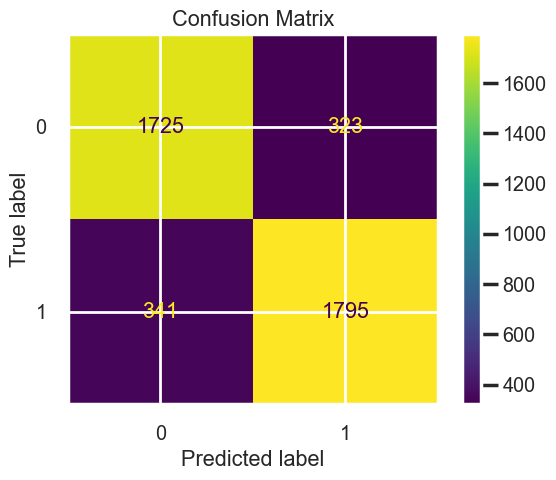

In [119]:

log_train = round(final_pipe.score(X_train, y_train) * 100, 2)
log_accuracy_MinMax = round(accuracy_score(y_pred_lr, y_test) * 100, 2)

print("Training Accuracy    :",log_train ,"%")
print("Model Accuracy Score :",log_accuracy_MinMax ,"%")
plot_confusion_matrix(final_pipe, X_test, y_test)
plt.title('Confusion Matrix')

In [88]:
from sklearn.metrics import classification_report
#classification report

In [89]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84      2048
           1       0.85      0.84      0.84      2136

    accuracy                           0.84      4184
   macro avg       0.84      0.84      0.84      4184
weighted avg       0.84      0.84      0.84      4184



In [91]:
#GridSearch
from sklearn.ensemble import RandomForestClassifier

In [104]:
numeric_pipeline = Pipeline([('numimputer', SimpleImputer(strategy = 'mean')), ('numnorm', StandardScaler())])


nominal_pipeline = Pipeline([
    ('onehotimputer', SimpleImputer(strategy = 'most_frequent')),
    ('onehotenc', OneHotEncoder(sparse = False, drop = 'first', handle_unknown = "ignore")), 
    ('onehotnorm', MaxAbsScaler())])


#OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

ct = ColumnTransformer(
    [ ("nominalpipe", nominal_pipeline, cat_cols),
     ("numpipe", numeric_pipeline, num_cols)])




forrest_pipe = Pipeline([('preprocess', ct),
                      ('model',
                       RandomForestClassifier(random_state=42))])
forrest_pipe

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('nominalpipe',
                                                  Pipeline(steps=[('onehotimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotenc',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False)),
                                                                  ('onehotnorm',
                                                                   MaxAbsScaler())]),
                                                  Index(['division', 'stance', 'method', 'time', 'time_format'], dtype='object')),
                                   

In [134]:
forrest_pipe.fit(X_train,y_train)
forrest_pipe.score(X_test,y_test)

c:\Users\Archi\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


0.858508604206501

In [96]:

y_pred_rf = forrest_pipe.predict(X_test)


c:\Users\Archi\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Training Accuracy    : 100.0 %
Model Accuracy Score : 86.14 %


c:\Users\Archi\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
c:\Users\Archi\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Text(0.5, 1.0, 'Confusion Matrix')

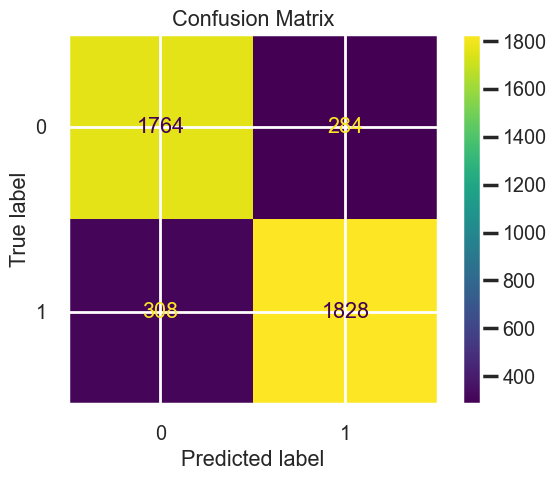

In [118]:
rf_train = round(forrest_pipe.score(X_train, y_train) * 100, 2)
rf_accuracy_MinMax = round(accuracy_score(y_pred_rf, y_test) * 100, 2)

print("Training Accuracy    :",rf_train ,"%")
print("Model Accuracy Score :",rf_accuracy_MinMax ,"%")
plot_confusion_matrix(forrest_pipe, X_test, y_test)
plt.title('Confusion Matrix')

In [98]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.85      0.86      0.86      2048
           1       0.87      0.86      0.86      2136

    accuracy                           0.86      4184
   macro avg       0.86      0.86      0.86      4184
weighted avg       0.86      0.86      0.86      4184



In [99]:
from sklearn.svm import SVC

In [106]:
numeric_pipeline = Pipeline([('numimputer', SimpleImputer(strategy = 'mean')), ('numnorm', StandardScaler())])


nominal_pipeline = Pipeline([
    ('onehotimputer', SimpleImputer(strategy = 'most_frequent')),
    ('onehotenc', OneHotEncoder(sparse = False, drop = 'first', handle_unknown = "ignore")), 
    ('onehotnorm', MaxAbsScaler())])


#OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

ct = ColumnTransformer(
    [ ("nominalpipe", nominal_pipeline, cat_cols),
     ("numpipe", numeric_pipeline, num_cols)])




SVC_pipe = Pipeline([('preprocess', ct),
                      ('model',
                       SVC(random_state=42))])
SVC_pipe

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('nominalpipe',
                                                  Pipeline(steps=[('onehotimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotenc',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False)),
                                                                  ('onehotnorm',
                                                                   MaxAbsScaler())]),
                                                  Index(['division', 'stance', 'method', 'time', 'time_format'], dtype='object')),
                                   

In [107]:
SVC_pipe.fit(X_train,y_train)
SVC_pipe.score(X_test,y_test)

c:\Users\Archi\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


0.8432122370936902

In [102]:
y_pred_SVC = SVC_pipe.predict(X_test)

c:\Users\Archi\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Training Accuracy    : 92.24 %
Model Accuracy Score : 84.32 %


c:\Users\Archi\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
c:\Users\Archi\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Text(0.5, 1.0, 'Confusion Matrix')

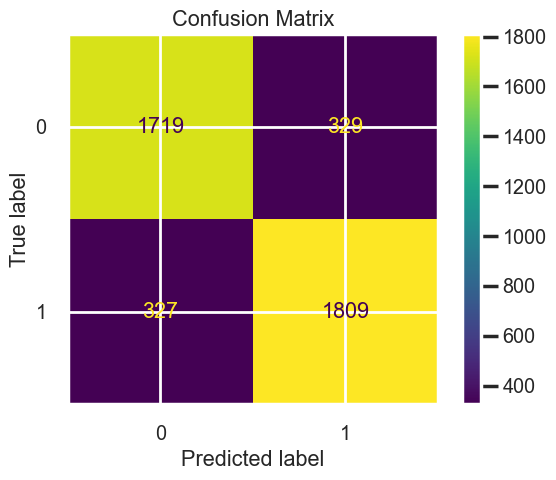

In [117]:
SVC_train = round(SVC_pipe.score(X_train, y_train) * 100, 2)
SVC_accuracy_MinMax = round(accuracy_score(y_pred_SVC, y_test) * 100, 2)

print("Training Accuracy    :",SVC_train ,"%")
print("Model Accuracy Score :",SVC_accuracy_MinMax ,"%")
plot_confusion_matrix(SVC_pipe, X_test, y_test)
plt.title('Confusion Matrix')

In [121]:
from sklearn.model_selection import GridSearchCV

In [124]:
param_grid = { 
    'model__n_estimators': [100, 200, 300, 400, 500],
    'model__max_features': ['auto', 'sqrt', 'log2'],
    'model__max_depth' : [4,5,6,7,8],
    'model__criterion' :['gini', 'entropy']
}

In [125]:
CV_rfc = GridSearchCV(forrest_pipe, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

c:\Users\Archi\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\Archi\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\Archi\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [3, 4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\Archi\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\Archi\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: F

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('nominalpipe',
                                                                         Pipeline(steps=[('onehotimputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehotenc',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        handle_unknown='ignore',
                                                                                                        sparse=False)),
                                                                                         ('onehotnorm',
                          

In [127]:
import pickle

In [128]:
pickle.dump(CV_rfc, open('model.pkl','wb'))

In [129]:
CV_rfc.best_params_

{'model__criterion': 'entropy',
 'model__max_depth': 8,
 'model__max_features': 'auto',
 'model__n_estimators': 500}

In [130]:
CV_rfc.best_score_

0.8432647625465266

In [178]:
CV_rfc.best_estimator_.feature_importance()

AttributeError: 'Pipeline' object has no attribute 'feature_importance'

In [131]:
#Random Forrest model is overfit, hence the 100% training acc, maybe reduce depth in pipeline

In [132]:
numeric_pipeline = Pipeline([('numimputer', SimpleImputer(strategy = 'mean')), ('numnorm', StandardScaler())])


nominal_pipeline = Pipeline([
    ('onehotimputer', SimpleImputer(strategy = 'most_frequent')),
    ('onehotenc', OneHotEncoder(sparse = False, drop = 'first', handle_unknown = "ignore")), 
    ('onehotnorm', MaxAbsScaler())])



ct = ColumnTransformer(
    [ ("nominalpipe", nominal_pipeline, cat_cols),
     ("numpipe", numeric_pipeline, num_cols)])




forrest_pipe_ovrfit = Pipeline([('preprocess', ct),
                      ('model',
                       RandomForestClassifier(random_state=42, criterion = 'entropy', max_depth = 4, max_features = 'auto',
n_estimators = 500))])
forrest_pipe_ovrfit

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('nominalpipe',
                                                  Pipeline(steps=[('onehotimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotenc',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False)),
                                                                  ('onehotnorm',
                                                                   MaxAbsScaler())]),
                                                  Index(['division', 'stance', 'method', 'time', 'time_format'], dtype='object')),
                                   

In [468]:
X_train.iloc[0,:]

time_format    5-5-5-5-5
reach               71.0
height              69.0
age                 38.0
knockdowns             1
Name: 4659, dtype: object

In [276]:
forrest_pipe_ovrfit.fit(X_train,y_train)
forrest_pipe_ovrfit.score(X_test,y_test)

c:\Users\Archi\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


0.8439292543021033

In [142]:
def get_feature_names(column_transformer):
    """Get feature names from all transformers.
    Returns
    -------
    feature_names : list of strings
        Names of the features produced by transform.
    """
    # Remove the internal helper function
    #check_is_fitted(column_transformer)
    
    # Turn loopkup into function for better handling with pipeline later
    def get_names(trans):
        # >> Original get_feature_names() method
        if trans == 'drop' or (
                hasattr(column, '__len__') and not len(column)):
            return []
        if trans == 'passthrough':
            if hasattr(column_transformer, '_df_columns'):
                if ((not isinstance(column, slice))
                        and all(isinstance(col, str) for col in column)):
                    return column
                else:
                    return column_transformer._df_columns[column]
            else:
                indices = np.arange(column_transformer._n_features)
                return ['x%d' % i for i in indices[column]]
        if not hasattr(trans, 'get_feature_names'):
        # >>> Change: Return input column names if no method avaiable
            # Turn error into a warning
            ("Transformer %s (type %s) does not "
                                 "provide get_feature_names. "
                                 "Will return input column names if available"
                                 % (str(name), type(trans).__name__))
            # For transformers without a get_features_names method, use the input
            # names to the column transformer
            if column is None:
                return []
            else:
                return [name + "__" + f for f in column]

        return [name + "__" + f for f in trans.get_feature_names()]
    
    ### Start of processing
    feature_names = []
    
    # Allow transformers to be pipelines. Pipeline steps are named differently, so preprocessing is needed
    if type(column_transformer) == Pipeline:
        l_transformers = [(name, trans, None, None) for step, name, trans in column_transformer._iter()]
    else:
        # For column transformers, follow the original method
        l_transformers = list(column_transformer._iter(fitted=True))
    
    
    for name, trans, column, _ in l_transformers: 
        if type(trans) == Pipeline:
            # Recursive call on pipeline
            _names = get_feature_names(trans)
            # if pipeline has no transformer that returns names
            if len(_names)==0:
                _names = [name + "__" + f for f in column]
            feature_names.extend(_names)
        else:
            feature_names.extend(get_names(trans))
    
    return feature_names

In [146]:
get_feature_names(ct)

c:\Users\Archi\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['onehotenc__x0_Catch Weight',
 'onehotenc__x0_Featherweight',
 'onehotenc__x0_Flyweight',
 'onehotenc__x0_Heavyweight',
 'onehotenc__x0_Light Heavyweight',
 'onehotenc__x0_Lightweight',
 'onehotenc__x0_Middleweight',
 'onehotenc__x0_Open Weight',
 'onehotenc__x0_Super Heavyweight',
 'onehotenc__x0_Welterweight',
 "onehotenc__x0_Women's Bantamweight",
 "onehotenc__x0_Women's Featherweight",
 "onehotenc__x0_Women's Flyweight",
 "onehotenc__x0_Women's Strawweight",
 'onehotenc__x1_Orthodox',
 'onehotenc__x1_Sideways',
 'onehotenc__x1_Southpaw',
 'onehotenc__x1_Switch',
 'onehotenc__x2_M-DEC',
 'onehotenc__x2_S-DEC',
 'onehotenc__x2_SUB',
 'onehotenc__x2_U-DEC',
 'onehotenc__x3_0:06',
 'onehotenc__x3_0:07',
 'onehotenc__x3_0:08',
 'onehotenc__x3_0:09',
 'onehotenc__x3_0:10',
 'onehotenc__x3_0:11',
 'onehotenc__x3_0:12',
 'onehotenc__x3_0:13',
 'onehotenc__x3_0:14',
 'onehotenc__x3_0:15',
 'onehotenc__x3_0:16',
 'onehotenc__x3_0:17',
 'onehotenc__x3_0:18',
 'onehotenc__x3_0:19',
 'onehoten

In [169]:
features = get_feature_names(ct)

c:\Users\Archi\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [186]:
coef = forrest_pipe_ovrfit.steps[1][1].feature_importances_

In [187]:
import pandas as pd
# Zip coefficients and names together and make a DataFrame
zipped = zip(features, coef)
df = pd.DataFrame(zipped, columns=["feature", "value"])
# Sort the features by the absolute value of their coefficient
df["abs_value"] = df["value"].apply(lambda x: abs(x))
df["colors"] = df["value"].apply(lambda x: "green" if x > 0 else "red")
df = df.sort_values("abs_value", ascending=False)

In [198]:
df.loc[df['feature'] == 'numpipe__Time_interval']

,feature,value,abs_value,colors
880,numpipe__Time_interval,0.0,0.0,red


Text(0.5, 0, 'Feature Name')

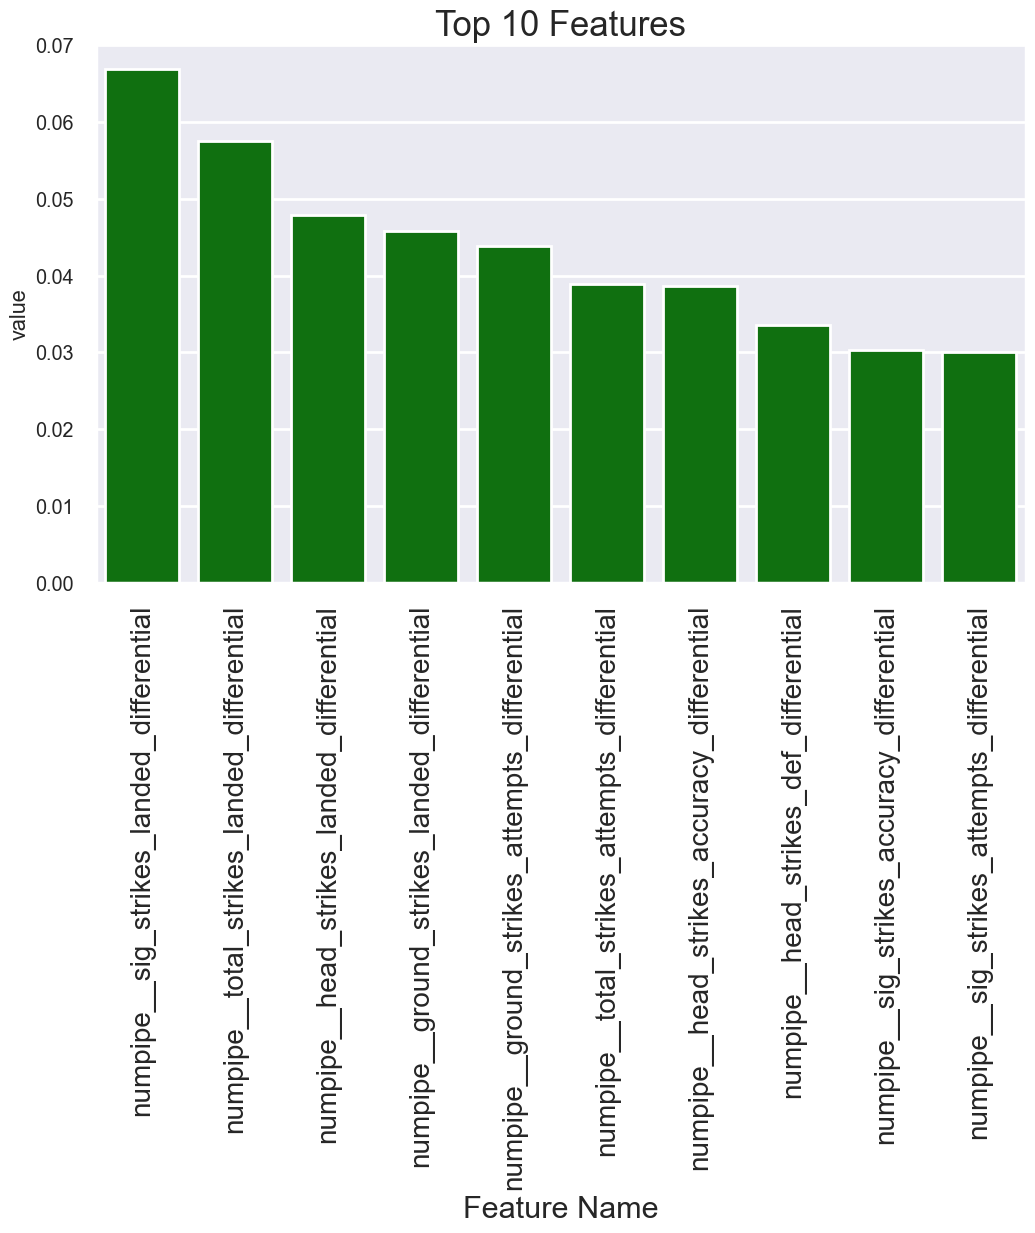

In [311]:
import seaborn as sns
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
sns.barplot(x="feature",
            y="value",
            data=df.head(10),
           palette=df.head()["colors"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=20)
ax.set_title("Top 10 Features", fontsize=25)

ax.set_xlabel("Feature Name", fontsize=22)

In [181]:
forrest_pipe_ovrfit.steps[1][1]

RandomForestClassifier(criterion='entropy', max_depth=4, n_estimators=500,
                       random_state=42)

In [199]:
#Look at missclassifications
#forrest_pipe_ovrfit
y_pred = forrest_pipe_ovrfit.predict(X_test)

c:\Users\Archi\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [200]:
y_pred

array([0, 0, 1, ..., 0, 0, 1])

In [214]:
X_test.reset_index()

,date,fight_url,event_url,fighter,opponent,division,stance,dob,method,total_comp_time,...,avg_ground_strikes_landed_per_min,precomp_avg_ground_strikes_landed_per_min,recent_avg_ground_strikes_landed_per_min,precomp_recent_avg_ground_strikes_landed_per_min,avg_ground_strikes_attempts_per_min,precomp_avg_ground_strikes_attempts_per_min,recent_avg_ground_strikes_attempts_per_min,precomp_recent_avg_ground_strikes_attempts_per_min,Time_interval,Descriptive_interval
10438,2021-12-18,http://ufcstats.com/fight-details/a43dcd04788d...,http://ufcstats.com/event-details/2a470ad41c22...,Raphael Assuncao,Ricky Simon,Bantamweight,Orthodox,1982-07-19,KO/TKO,434,...,0.346950,0.368634,0.066667,0.066667,0.461842,0.490707,0.066667,0.066667,560,Very rarely (less often than once per year)
11948,2018-11-24,http://ufcstats.com/fight-details/8c109a0c53ed...,http://ufcstats.com/event-details/de25520d54ea...,Sumudaerji,Louis Smolka,Bantamweight,Southpaw,1996-01-20,SUB,427,...,1.967213,NaN,NaN,NaN,2.388759,NaN,NaN,NaN,0,Debut/on the same day
2817,2020-02-22,http://ufcstats.com/fight-details/5fceb95c29d9...,http://ufcstats.com/event-details/33b2f68ef952...,Dan Hooker,Paul Felder,Lightweight,Switch,1990-02-13,S-DEC,1500,...,0.503130,0.541833,0.881046,0.881046,0.629082,0.677473,0.947712,0.947712,140,Moderately often (~2 bouts per year)
10839,2018-09-08,http://ufcstats.com/fight-details/9399c772adc7...,http://ufcstats.com/event-details/d5ae80746317...,Robert Sanchez,Jarred Brooks,Flyweight,Orthodox,1986-03-05,S-DEC,900,...,0.351412,0.127119,0.351412,NaN,0.587571,0.381356,0.587571,NaN,202,Infrequently (~1 bout per year)
3235,2020-07-18,http://ufcstats.com/fight-details/4dc5039b2101...,http://ufcstats.com/event-details/ddbd0d6259ce...,Deiveson Figueiredo,Joseph Benavidez,Flyweight,Orthodox,1987-12-18,SUB,288,...,1.291329,0.853787,1.742150,0.367150,1.643338,1.223755,1.811594,0.500483,140,Moderately often (~2 bouts per year)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12236,2018-08-04,http://ufcstats.com/fight-details/3b03f8d3a55f...,http://ufcstats.com/event-details/03b1e846b09f...,Thiago Santos,Kevin Holland,Middleweight,Orthodox,1984-01-07,U-DEC,900,...,2.048718,1.971245,3.358494,2.782277,3.367578,3.112881,5.286318,4.045441,105,Often (~3 bouts per year)
4704,2021-02-13,http://ufcstats.com/fight-details/be94e5b7a35c...,http://ufcstats.com/event-details/3f7c14c7eca7...,Gilbert Burns,Kamaru Usman,Welterweight,Orthodox,1986-07-20,KO/TKO,634,...,0.690396,0.736422,1.292294,1.314517,0.879531,0.938166,1.435498,1.502165,259,Infrequently (~1 bout per year)
8549,2021-01-16,http://ufcstats.com/fight-details/6b0da0b1cda7...,http://ufcstats.com/event-details/307064d3e0f0...,Matt Brown,Carlos Condit,Welterweight,Orthodox,1981-01-10,U-DEC,900,...,1.148809,1.169917,0.805042,0.605042,1.468291,1.496558,1.084781,0.840336,245,Infrequently (~1 bout per year)
12139,2017-12-01,http://ufcstats.com/fight-details/c11b2cbe2460...,http://ufcstats.com/event-details/30e8b4505f5c...,Terrion Ware,Sean O'Malley,Bantamweight,Orthodox,1986-03-31,U-DEC,900,...,0.066667,0.133333,NaN,NaN,0.133333,0.266667,NaN,NaN,146,Moderately often (~2 bouts per year)


array([0, 0, 1, ..., 0, 0, 1])

In [242]:
pred_df = pd.concat([X_test.reset_index(), pd.Series(y_test)],1)


C:\Users\Archi\AppData\Local\Temp\ipykernel_19320\1711059123.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  pred_df = pd.concat([X_test.reset_index(), pd.Series(y_test)],1)


In [244]:
pred_df = pred_df.rename(columns={0:'y_test'})

In [245]:
pred_df.head()

,index,date,fight_url,event_url,fighter,opponent,division,stance,dob,method,...,precomp_avg_ground_strikes_landed_per_min,recent_avg_ground_strikes_landed_per_min,precomp_recent_avg_ground_strikes_landed_per_min,avg_ground_strikes_attempts_per_min,precomp_avg_ground_strikes_attempts_per_min,recent_avg_ground_strikes_attempts_per_min,precomp_recent_avg_ground_strikes_attempts_per_min,Time_interval,Descriptive_interval,y_test
0,10438,2021-12-18,http://ufcstats.com/fight-details/a43dcd04788d...,http://ufcstats.com/event-details/2a470ad41c22...,Raphael Assuncao,Ricky Simon,Bantamweight,Orthodox,1982-07-19,KO/TKO,...,0.368634,0.066667,0.066667,0.461842,0.490707,0.066667,0.066667,560,Very rarely (less often than once per year),0
1,11948,2018-11-24,http://ufcstats.com/fight-details/8c109a0c53ed...,http://ufcstats.com/event-details/de25520d54ea...,Sumudaerji,Louis Smolka,Bantamweight,Southpaw,1996-01-20,SUB,...,NaN,NaN,NaN,2.388759,NaN,NaN,NaN,0,Debut/on the same day,0
2,2817,2020-02-22,http://ufcstats.com/fight-details/5fceb95c29d9...,http://ufcstats.com/event-details/33b2f68ef952...,Dan Hooker,Paul Felder,Lightweight,Switch,1990-02-13,S-DEC,...,0.541833,0.881046,0.881046,0.629082,0.677473,0.947712,0.947712,140,Moderately often (~2 bouts per year),1
3,10839,2018-09-08,http://ufcstats.com/fight-details/9399c772adc7...,http://ufcstats.com/event-details/d5ae80746317...,Robert Sanchez,Jarred Brooks,Flyweight,Orthodox,1986-03-05,S-DEC,...,0.127119,0.351412,NaN,0.587571,0.381356,0.587571,NaN,202,Infrequently (~1 bout per year),0
4,3235,2020-07-18,http://ufcstats.com/fight-details/4dc5039b2101...,http://ufcstats.com/event-details/ddbd0d6259ce...,Deiveson Figueiredo,Joseph Benavidez,Flyweight,Orthodox,1987-12-18,SUB,...,0.853787,1.742150,0.367150,1.643338,1.223755,1.811594,0.500483,140,Moderately often (~2 bouts per year),1


In [246]:
pred_df = pd.concat([pred_df, pd.Series(y_pred)],1)

C:\Users\Archi\AppData\Local\Temp\ipykernel_19320\2129551504.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  pred_df = pd.concat([pred_df, pd.Series(y_pred)],1)


In [247]:
pred_df.head()

,index,date,fight_url,event_url,fighter,opponent,division,stance,dob,method,...,recent_avg_ground_strikes_landed_per_min,precomp_recent_avg_ground_strikes_landed_per_min,avg_ground_strikes_attempts_per_min,precomp_avg_ground_strikes_attempts_per_min,recent_avg_ground_strikes_attempts_per_min,precomp_recent_avg_ground_strikes_attempts_per_min,Time_interval,Descriptive_interval,y_test,0
0,10438,2021-12-18,http://ufcstats.com/fight-details/a43dcd04788d...,http://ufcstats.com/event-details/2a470ad41c22...,Raphael Assuncao,Ricky Simon,Bantamweight,Orthodox,1982-07-19,KO/TKO,...,0.066667,0.066667,0.461842,0.490707,0.066667,0.066667,560,Very rarely (less often than once per year),0,0
1,11948,2018-11-24,http://ufcstats.com/fight-details/8c109a0c53ed...,http://ufcstats.com/event-details/de25520d54ea...,Sumudaerji,Louis Smolka,Bantamweight,Southpaw,1996-01-20,SUB,...,NaN,NaN,2.388759,NaN,NaN,NaN,0,Debut/on the same day,0,0
2,2817,2020-02-22,http://ufcstats.com/fight-details/5fceb95c29d9...,http://ufcstats.com/event-details/33b2f68ef952...,Dan Hooker,Paul Felder,Lightweight,Switch,1990-02-13,S-DEC,...,0.881046,0.881046,0.629082,0.677473,0.947712,0.947712,140,Moderately often (~2 bouts per year),1,1
3,10839,2018-09-08,http://ufcstats.com/fight-details/9399c772adc7...,http://ufcstats.com/event-details/d5ae80746317...,Robert Sanchez,Jarred Brooks,Flyweight,Orthodox,1986-03-05,S-DEC,...,0.351412,NaN,0.587571,0.381356,0.587571,NaN,202,Infrequently (~1 bout per year),0,0
4,3235,2020-07-18,http://ufcstats.com/fight-details/4dc5039b2101...,http://ufcstats.com/event-details/ddbd0d6259ce...,Deiveson Figueiredo,Joseph Benavidez,Flyweight,Orthodox,1987-12-18,SUB,...,1.742150,0.367150,1.643338,1.223755,1.811594,0.500483,140,Moderately often (~2 bouts per year),1,1


In [249]:
pred_df = pred_df.rename(columns={0:'y_pred'})

In [250]:
pred_df.head()

,index,date,fight_url,event_url,fighter,opponent,division,stance,dob,method,...,recent_avg_ground_strikes_landed_per_min,precomp_recent_avg_ground_strikes_landed_per_min,avg_ground_strikes_attempts_per_min,precomp_avg_ground_strikes_attempts_per_min,recent_avg_ground_strikes_attempts_per_min,precomp_recent_avg_ground_strikes_attempts_per_min,Time_interval,Descriptive_interval,y_test,y_pred
0,10438,2021-12-18,http://ufcstats.com/fight-details/a43dcd04788d...,http://ufcstats.com/event-details/2a470ad41c22...,Raphael Assuncao,Ricky Simon,Bantamweight,Orthodox,1982-07-19,KO/TKO,...,0.066667,0.066667,0.461842,0.490707,0.066667,0.066667,560,Very rarely (less often than once per year),0,0
1,11948,2018-11-24,http://ufcstats.com/fight-details/8c109a0c53ed...,http://ufcstats.com/event-details/de25520d54ea...,Sumudaerji,Louis Smolka,Bantamweight,Southpaw,1996-01-20,SUB,...,NaN,NaN,2.388759,NaN,NaN,NaN,0,Debut/on the same day,0,0
2,2817,2020-02-22,http://ufcstats.com/fight-details/5fceb95c29d9...,http://ufcstats.com/event-details/33b2f68ef952...,Dan Hooker,Paul Felder,Lightweight,Switch,1990-02-13,S-DEC,...,0.881046,0.881046,0.629082,0.677473,0.947712,0.947712,140,Moderately often (~2 bouts per year),1,1
3,10839,2018-09-08,http://ufcstats.com/fight-details/9399c772adc7...,http://ufcstats.com/event-details/d5ae80746317...,Robert Sanchez,Jarred Brooks,Flyweight,Orthodox,1986-03-05,S-DEC,...,0.351412,NaN,0.587571,0.381356,0.587571,NaN,202,Infrequently (~1 bout per year),0,0
4,3235,2020-07-18,http://ufcstats.com/fight-details/4dc5039b2101...,http://ufcstats.com/event-details/ddbd0d6259ce...,Deiveson Figueiredo,Joseph Benavidez,Flyweight,Orthodox,1987-12-18,SUB,...,1.742150,0.367150,1.643338,1.223755,1.811594,0.500483,140,Moderately often (~2 bouts per year),1,1


In [254]:
pred_df.loc[pred_df["y_test"] == "y_pred"]

,index,date,fight_url,event_url,fighter,opponent,division,stance,dob,method,...,recent_avg_ground_strikes_landed_per_min,precomp_recent_avg_ground_strikes_landed_per_min,avg_ground_strikes_attempts_per_min,precomp_avg_ground_strikes_attempts_per_min,recent_avg_ground_strikes_attempts_per_min,precomp_recent_avg_ground_strikes_attempts_per_min,Time_interval,Descriptive_interval,y_test,y_pred


In [256]:
missclass = pred_df.query('y_test != y_pred') 

In [265]:
missclass['method'].value_counts()

U-DEC     198
SUB       183
S-DEC     164
KO/TKO    101
M-DEC       7
Name: method, dtype: int64

In [261]:
missclass

,index,date,fight_url,event_url,fighter,opponent,division,stance,dob,method,...,recent_avg_ground_strikes_landed_per_min,precomp_recent_avg_ground_strikes_landed_per_min,avg_ground_strikes_attempts_per_min,precomp_avg_ground_strikes_attempts_per_min,recent_avg_ground_strikes_attempts_per_min,precomp_recent_avg_ground_strikes_attempts_per_min,Time_interval,Descriptive_interval,y_test,y_pred
5,4001,2016-10-01,http://ufcstats.com/fight-details/958f6e5b79ff...,http://ufcstats.com/event-details/a196332ee4aa...,Elizeu Zaleski dos Santos,Keita Nakamura,Welterweight,Orthodox,1986-12-11,U-DEC,...,0.158876,NaN,0.247765,0.138314,0.247765,NaN,168,Moderately often (~2 bouts per year),1,0
27,10011,2012-05-26,http://ufcstats.com/fight-details/3fc1ebe73920...,http://ufcstats.com/event-details/4985113c0928...,Paul Sass,Jacob Volkmann,Lightweight,Orthodox,1988-08-04,SUB,...,0.000000,NaN,0.000000,0.000000,0.000000,NaN,238,Infrequently (~1 bout per year),1,0
29,9743,1995-12-16,http://ufcstats.com/fight-details/717f3c393227...,http://ufcstats.com/event-details/31bbd46d57df...,Oleg Taktarov,Marco Ruas,Open Weight,Orthodox,1967-08-26,U-DEC,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,Debut/on the same day,1,0
30,5493,2016-02-21,http://ufcstats.com/fight-details/b7653a82f4b0...,http://ufcstats.com/event-details/d56bb6dff2ae...,James Krause,Shane Campbell,Lightweight,Orthodox,1986-06-04,U-DEC,...,0.000000,0.000000,0.219746,0.256370,0.000000,0.000000,211,Infrequently (~1 bout per year),1,0
34,5902,2017-05-13,http://ufcstats.com/fight-details/af2ef7566465...,http://ufcstats.com/event-details/5df105092645...,Jessica Aguilar,Cortney Casey,Women's Strawweight,Orthodox,1982-05-08,U-DEC,...,NaN,NaN,1.166667,0.000000,NaN,NaN,651,Very rarely (less often than once per year),0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4155,8778,2022-03-26,http://ufcstats.com/fight-details/3f92025b29e0...,http://ufcstats.com/event-details/1fac46d466ab...,Max Griffin,Neil Magny,Welterweight,Orthodox,1985-11-29,S-DEC,...,0.409524,0.365079,2.177099,2.336301,0.587302,0.498413,259,Infrequently (~1 bout per year),0,1
4162,9864,2022-02-19,http://ufcstats.com/fight-details/93026443e514...,http://ufcstats.com/event-details/77940e45bc86...,Parker Porter,Alan Baudot,Heavyweight,Orthodox,1985-04-22,U-DEC,...,0.111111,0.044444,0.150000,0.088889,0.200000,0.088889,182,Moderately often (~2 bouts per year),1,0
4166,11817,2009-06-13,http://ufcstats.com/fight-details/440936f9db78...,http://ufcstats.com/event-details/cb6783c39c01...,Stefan Struve,Denis Stojnic,Heavyweight,Orthodox,1988-02-18,SUB,...,NaN,NaN,0.000000,0.000000,NaN,NaN,112,Often (~3 bouts per year),1,0
4169,2297,2021-05-15,http://ufcstats.com/fight-details/de332779baa1...,http://ufcstats.com/event-details/744f50016c39...,Christos Giagos,Sean Soriano,Lightweight,Orthodox,1990-01-23,SUB,...,0.389044,0.400000,1.562406,1.736815,0.522377,0.733333,147,Moderately often (~2 bouts per year),1,0


In [263]:
missclass['fighter'].value_counts()

Joseph Benavidez    5
Danny Castillo      4
Stefan Struve       4
Michael Chiesa      4
Clay Guida          4
                   ..
Bruno Santos        1
Joanne Wood         1
Jarred Brooks       1
Mike Rodriguez      1
Stipe Miocic        1
Name: fighter, Length: 502, dtype: int64

In [266]:
import seaborn as sns

In [268]:
sns.pairplot(missclass)

KeyboardInterrupt: 

ValueError: Image size of 129750x129750 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 129750x129750 with 85 Axes>

In [269]:
from sklearn.decomposition import PCA

In [285]:
numeric_pipeline = Pipeline([('numimputer', SimpleImputer(strategy = 'mean')), ('numnorm', StandardScaler()), ('pca', PCA(n_components= 90)),])


nominal_pipeline = Pipeline([
    ('onehotimputer', SimpleImputer(strategy = 'most_frequent')),
    ('onehotenc', OneHotEncoder(sparse = False, drop = 'first', handle_unknown = "ignore")), 
    ('onehotnorm', MaxAbsScaler())])



ct = ColumnTransformer(
    [ ("nominalpipe", nominal_pipeline, cat_cols),
     ("numpipe", numeric_pipeline, num_cols)])




forrest_pipe_pca = Pipeline([('preprocess', ct), 
                      ('model',
                       RandomForestClassifier(random_state=42, criterion = 'entropy', max_depth = 4, max_features = 'auto',
n_estimators = 500))])
forrest_pipe_pca

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('nominalpipe',
                                                  Pipeline(steps=[('onehotimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotenc',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False)),
                                                                  ('onehotnorm',
                                                                   MaxAbsScaler())]),
                                                  Index(['division', 'stance', 'method', 'time', 'time_format'], dtype='object')),
                                   

In [286]:
forrest_pipe_pca.fit(X_train, y_train)
forrest_pipe_pca.score(X_test,y_test)

c:\Users\Archi\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


0.7710325047801148

In [287]:
y_pred_pca = forrest_pipe_pca.predict(X_test)

c:\Users\Archi\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Training Accuracy    : 77.77 %
Model Accuracy Score : 77.1 %


c:\Users\Archi\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
c:\Users\Archi\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Text(0.5, 1.0, 'Confusion Matrix')

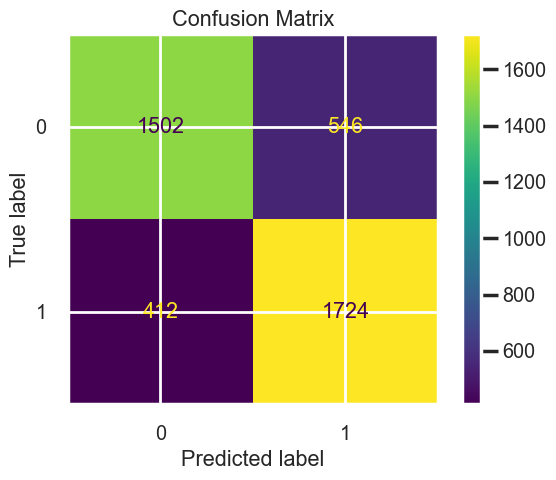

In [288]:
pca_train = round(forrest_pipe_pca.score(X_train, y_train) * 100, 2)
pca_accuracy_MinMax = round(accuracy_score(y_pred_pca, y_test) * 100, 2)

print("Training Accuracy    :",pca_train ,"%")
print("Model Accuracy Score :",pca_accuracy_MinMax ,"%")
plot_confusion_matrix(forrest_pipe_pca, X_test, y_test)
plt.title('Confusion Matrix')

In [290]:
y_pred2 = forrest_pipe_pca.predict(X_test)

c:\Users\Archi\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [291]:
X_test.reset_index()

,index,date,fight_url,event_url,fighter,opponent,division,stance,dob,method,...,avg_ground_strikes_landed_per_min,precomp_avg_ground_strikes_landed_per_min,recent_avg_ground_strikes_landed_per_min,precomp_recent_avg_ground_strikes_landed_per_min,avg_ground_strikes_attempts_per_min,precomp_avg_ground_strikes_attempts_per_min,recent_avg_ground_strikes_attempts_per_min,precomp_recent_avg_ground_strikes_attempts_per_min,Time_interval,Descriptive_interval
0,10438,2021-12-18,http://ufcstats.com/fight-details/a43dcd04788d...,http://ufcstats.com/event-details/2a470ad41c22...,Raphael Assuncao,Ricky Simon,Bantamweight,Orthodox,1982-07-19,KO/TKO,...,0.346950,0.368634,0.066667,0.066667,0.461842,0.490707,0.066667,0.066667,560,Very rarely (less often than once per year)
1,11948,2018-11-24,http://ufcstats.com/fight-details/8c109a0c53ed...,http://ufcstats.com/event-details/de25520d54ea...,Sumudaerji,Louis Smolka,Bantamweight,Southpaw,1996-01-20,SUB,...,1.967213,NaN,NaN,NaN,2.388759,NaN,NaN,NaN,0,Debut/on the same day
2,2817,2020-02-22,http://ufcstats.com/fight-details/5fceb95c29d9...,http://ufcstats.com/event-details/33b2f68ef952...,Dan Hooker,Paul Felder,Lightweight,Switch,1990-02-13,S-DEC,...,0.503130,0.541833,0.881046,0.881046,0.629082,0.677473,0.947712,0.947712,140,Moderately often (~2 bouts per year)
3,10839,2018-09-08,http://ufcstats.com/fight-details/9399c772adc7...,http://ufcstats.com/event-details/d5ae80746317...,Robert Sanchez,Jarred Brooks,Flyweight,Orthodox,1986-03-05,S-DEC,...,0.351412,0.127119,0.351412,NaN,0.587571,0.381356,0.587571,NaN,202,Infrequently (~1 bout per year)
4,3235,2020-07-18,http://ufcstats.com/fight-details/4dc5039b2101...,http://ufcstats.com/event-details/ddbd0d6259ce...,Deiveson Figueiredo,Joseph Benavidez,Flyweight,Orthodox,1987-12-18,SUB,...,1.291329,0.853787,1.742150,0.367150,1.643338,1.223755,1.811594,0.500483,140,Moderately often (~2 bouts per year)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4179,12236,2018-08-04,http://ufcstats.com/fight-details/3b03f8d3a55f...,http://ufcstats.com/event-details/03b1e846b09f...,Thiago Santos,Kevin Holland,Middleweight,Orthodox,1984-01-07,U-DEC,...,2.048718,1.971245,3.358494,2.782277,3.367578,3.112881,5.286318,4.045441,105,Often (~3 bouts per year)
4180,4704,2021-02-13,http://ufcstats.com/fight-details/be94e5b7a35c...,http://ufcstats.com/event-details/3f7c14c7eca7...,Gilbert Burns,Kamaru Usman,Welterweight,Orthodox,1986-07-20,KO/TKO,...,0.690396,0.736422,1.292294,1.314517,0.879531,0.938166,1.435498,1.502165,259,Infrequently (~1 bout per year)
4181,8549,2021-01-16,http://ufcstats.com/fight-details/6b0da0b1cda7...,http://ufcstats.com/event-details/307064d3e0f0...,Matt Brown,Carlos Condit,Welterweight,Orthodox,1981-01-10,U-DEC,...,1.148809,1.169917,0.805042,0.605042,1.468291,1.496558,1.084781,0.840336,245,Infrequently (~1 bout per year)
4182,12139,2017-12-01,http://ufcstats.com/fight-details/c11b2cbe2460...,http://ufcstats.com/event-details/30e8b4505f5c...,Terrion Ware,Sean O'Malley,Bantamweight,Orthodox,1986-03-31,U-DEC,...,0.066667,0.133333,NaN,NaN,0.133333,0.266667,NaN,NaN,146,Moderately often (~2 bouts per year)


In [292]:
pred_df = pd.concat([X_test.reset_index(), pd.Series(y_test)],1)

C:\Users\Archi\AppData\Local\Temp\ipykernel_19320\605226617.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  pred_df = pd.concat([X_test.reset_index(), pd.Series(y_test)],1)


In [293]:
pred_df = pred_df.rename(columns={0:'y_test'})

In [294]:
pred_df = pd.concat([pred_df, pd.Series(y_pred2)],1)

C:\Users\Archi\AppData\Local\Temp\ipykernel_19320\3974207297.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  pred_df = pd.concat([pred_df, pd.Series(y_pred2)],1)


In [295]:
pred_df = pred_df.rename(columns={0:'y_pred2'})

In [296]:
missclass2 = pred_df.query('y_test != y_pred2') 

In [297]:
missclass2.head()

,index,date,fight_url,event_url,fighter,opponent,division,stance,dob,method,...,recent_avg_ground_strikes_landed_per_min,precomp_recent_avg_ground_strikes_landed_per_min,avg_ground_strikes_attempts_per_min,precomp_avg_ground_strikes_attempts_per_min,recent_avg_ground_strikes_attempts_per_min,precomp_recent_avg_ground_strikes_attempts_per_min,Time_interval,Descriptive_interval,y_test,y_pred2
5,4001,2016-10-01,http://ufcstats.com/fight-details/958f6e5b79ff...,http://ufcstats.com/event-details/a196332ee4aa...,Elizeu Zaleski dos Santos,Keita Nakamura,Welterweight,Orthodox,1986-12-11,U-DEC,...,0.158876,NaN,0.247765,0.138314,0.247765,NaN,168,Moderately often (~2 bouts per year),1,0
7,5076,2018-05-19,http://ufcstats.com/fight-details/79c22394d9c2...,http://ufcstats.com/event-details/314412147002...,Humberto Bandenay,Gabriel Benitez,Featherweight,Southpaw,1994-09-04,KO/TKO,...,NaN,NaN,2.307692,4.615385,NaN,NaN,287,Infrequently (~1 bout per year),0,1
11,1318,2015-08-01,http://ufcstats.com/fight-details/60c62fb7bd17...,http://ufcstats.com/event-details/a9c45a8b21ea...,Bethe Correia,Ronda Rousey,Women's Bantamweight,Orthodox,1983-06-22,KO/TKO,...,0.048077,0.048077,0.036058,0.048077,0.048077,0.048077,336,Infrequently (~1 bout per year),0,1
30,5493,2016-02-21,http://ufcstats.com/fight-details/b7653a82f4b0...,http://ufcstats.com/event-details/d56bb6dff2ae...,James Krause,Shane Campbell,Lightweight,Orthodox,1986-06-04,U-DEC,...,0.000000,0.000000,0.219746,0.256370,0.000000,0.000000,211,Infrequently (~1 bout per year),1,0
34,5902,2017-05-13,http://ufcstats.com/fight-details/af2ef7566465...,http://ufcstats.com/event-details/5df105092645...,Jessica Aguilar,Cortney Casey,Women's Strawweight,Orthodox,1982-05-08,U-DEC,...,NaN,NaN,1.166667,0.000000,NaN,NaN,651,Very rarely (less often than once per year),0,1


In [343]:
#H2H
f = (sherdog_data.loc[sherdog_data['fighter'] == 'Jan Blachowicz'])
o = sherdog_data.loc[sherdog_data['fighter'] == 'Magomed Ankalaev']
#H2H_df = pd.concat(,1)


In [395]:
o


,date,fight_url,event_url,result,fighter,opponent,division,stance,dob,method,...,avg_ground_strikes_landed_per_min,precomp_avg_ground_strikes_landed_per_min,recent_avg_ground_strikes_landed_per_min,precomp_recent_avg_ground_strikes_landed_per_min,avg_ground_strikes_attempts_per_min,precomp_avg_ground_strikes_attempts_per_min,recent_avg_ground_strikes_attempts_per_min,precomp_recent_avg_ground_strikes_attempts_per_min,Time_interval,Descriptive_interval
8043,2022-03-12,http://ufcstats.com/fight-details/8aa16cc1ba99...,http://ufcstats.com/event-details/1f9344211ca7...,win,Magomed Ankalaev,Thiago Santos,Light Heavyweight,Orthodox,1992-06-02,U-DEC,...,0.784682,0.872767,0.315556,0.752209,0.968879,1.079989,0.360000,1.028314,133,Moderately often (~2 bouts per year)
8044,2021-10-30,http://ufcstats.com/fight-details/58b19ba734fe...,http://ufcstats.com/event-details/3974fa35c917...,win,Magomed Ankalaev,Volkan Oezdemir,Light Heavyweight,Orthodox,1992-06-02,U-DEC,...,0.872767,0.987924,0.752209,0.729987,1.079989,1.224750,1.028314,1.006092,245,Infrequently (~1 bout per year)
8045,2021-02-27,http://ufcstats.com/fight-details/3a4e2dffcdd1...,http://ufcstats.com/event-details/81b57acd6975...,win,Magomed Ankalaev,Nikita Krylov,Light Heavyweight,Orthodox,1992-06-02,U-DEC,...,0.987924,1.019245,0.729987,1.003861,1.224750,1.273319,1.006092,1.267318,126,Moderately often (~2 bouts per year)
8046,2020-10-24,http://ufcstats.com/fight-details/eedcb6c5d163...,http://ufcstats.com/event-details/c3c38c86f5ab...,win,Magomed Ankalaev,Ion Cutelaba,Light Heavyweight,Orthodox,1992-06-02,KO/TKO,...,1.019245,0.945102,1.003861,0.673874,1.273319,1.110994,1.267318,0.727893,238,Infrequently (~1 bout per year)
8047,2020-02-29,http://ufcstats.com/fight-details/f5b49f4c5a27...,http://ufcstats.com/event-details/fc9a9559a05f...,win,Magomed Ankalaev,Ion Cutelaba,Light Heavyweight,Orthodox,1992-06-02,KO/TKO,...,0.945102,1.181377,0.673874,0.885514,1.110994,1.388743,0.727893,0.939533,112,Often (~3 bouts per year)
8048,2019-11-09,http://ufcstats.com/fight-details/343749a2f7c5...,http://ufcstats.com/event-details/8d5daf67983b...,win,Magomed Ankalaev,Dalcha Lungiambula,Light Heavyweight,Orthodox,1992-06-02,KO/TKO,...,1.181377,1.034629,0.885514,1.034629,1.388743,1.279320,0.939533,1.279320,259,Infrequently (~1 bout per year)
8049,2019-02-23,http://ufcstats.com/fight-details/14c505d7ad55...,http://ufcstats.com/event-details/6546af7ab545...,win,Magomed Ankalaev,Klidson Abreu,Light Heavyweight,Orthodox,1992-06-02,U-DEC,...,1.034629,1.351943,1.034629,NaN,1.279320,1.685647,1.279320,NaN,161,Moderately often (~2 bouts per year)
8050,2018-09-15,http://ufcstats.com/fight-details/1687e2cd061b...,http://ufcstats.com/event-details/8d49545dadf9...,win,Magomed Ankalaev,Marcin Prachnio,Light Heavyweight,Orthodox,1992-06-02,KO/TKO,...,1.351943,2.068966,NaN,NaN,1.685647,2.736374,NaN,NaN,182,Moderately often (~2 bouts per year)
8051,2018-03-17,http://ufcstats.com/fight-details/714d6fc1eaca...,http://ufcstats.com/event-details/eed2b71d77d9...,loss,Magomed Ankalaev,Paul Craig,Light Heavyweight,Orthodox,1992-06-02,SUB,...,2.068966,NaN,NaN,NaN,2.736374,NaN,NaN,NaN,0,Debut/on the same day


In [424]:
fcat = f[['division', 'stance', 'method', 'time', 'time_format']]
fcat = fcat.mode()
fcat
f
jan = f.mean(axis=0)
jan
jan = jan.to_frame()
jan = jan.T
jan
frames = [fcat, jan]
janbla= fcat.join(jan)

C:\Users\Archi\AppData\Local\Temp\ipykernel_19320\4240980116.py:5: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  jan = f.mean(axis=0)
C:\Users\Archi\AppData\Local\Temp\ipykernel_19320\4240980116.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  jan = f.mean(axis=0)


In [431]:
fcat

,division,stance,method,time,time_format
0,Light Heavyweight,Orthodox,U-DEC,5:00,5-5-5


In [425]:
janbla

,division,stance,method,time,time_format,total_comp_time,round,reach,height,age,...,precomp_recent_avg_clinch_strikes_attempts_per_min,avg_ground_strikes_landed_per_min,precomp_avg_ground_strikes_landed_per_min,recent_avg_ground_strikes_landed_per_min,precomp_recent_avg_ground_strikes_landed_per_min,avg_ground_strikes_attempts_per_min,precomp_avg_ground_strikes_attempts_per_min,recent_avg_ground_strikes_attempts_per_min,precomp_recent_avg_ground_strikes_attempts_per_min,Time_interval
0,Light Heavyweight,Orthodox,U-DEC,5:00,5-5-5,739.777778,2.722222,78.0,74.0,39.0,...,0.591606,1.130493,1.161044,0.536624,0.55541,1.397086,1.433689,0.699599,0.727472,154.388889


In [421]:
ocat = o[['division', 'stance', 'method', 'time', 'time_format']]
ocat = ocat.mode()

mag = o.mean(axis=0)
mag = mag.to_frame()
mag = mag.T

frames2 = [ocat, mag]
mago= ocat.join(mag)

C:\Users\Archi\AppData\Local\Temp\ipykernel_19320\2913145175.py:4: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  mag = o.mean(axis=0)
C:\Users\Archi\AppData\Local\Temp\ipykernel_19320\2913145175.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mag = o.mean(axis=0)


In [426]:
ocat = o[['division', 'stance', 'method', 'time', 'time_format']]
ocat = ocat.mode()


In [427]:
ocat

,division,stance,method,time,time_format
0,Light Heavyweight,Orthodox,KO/TKO,5:00,5-5-5
1,NaN,NaN,U-DEC,NaN,NaN


In [429]:
ocat = ocat.drop(labels=1)

In [430]:
ocat

,division,stance,method,time,time_format
0,Light Heavyweight,Orthodox,KO/TKO,5:00,5-5-5


In [432]:
mag = o.mean(axis=0)
mag = mag.to_frame()
mag = mag.T

frames2 = [ocat, mag]
mago= ocat.join(mag)

C:\Users\Archi\AppData\Local\Temp\ipykernel_19320\1353099601.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  mag = o.mean(axis=0)
C:\Users\Archi\AppData\Local\Temp\ipykernel_19320\1353099601.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mag = o.mean(axis=0)


In [435]:
mago

,division,stance,method,time,time_format,total_comp_time,round,reach,height,age,...,precomp_recent_avg_clinch_strikes_attempts_per_min,avg_ground_strikes_landed_per_min,precomp_avg_ground_strikes_landed_per_min,recent_avg_ground_strikes_landed_per_min,precomp_recent_avg_ground_strikes_landed_per_min,avg_ground_strikes_attempts_per_min,precomp_avg_ground_strikes_attempts_per_min,recent_avg_ground_strikes_attempts_per_min,precomp_recent_avg_ground_strikes_attempts_per_min,Time_interval
0,Light Heavyweight,Orthodox,KO/TKO,5:00,5-5-5,690.444444,2.555556,75.0,75.0,30.0,...,0.440722,1.138515,1.182744,0.770804,0.846679,1.416446,1.472392,0.944067,1.041412,161.777778


In [434]:
mago = mago.drop(labels=1)

KeyError: '[1] not found in axis'

In [415]:
def H2H2(x,y):
    result = 'Alexander Volkanovski'
    return result

def H2H(x, y):
    result2 = "Magomed Ankalaev"
    return result2

In [438]:
mago

,division,stance,method,time,time_format,total_comp_time,round,reach,height,age,...,precomp_recent_avg_clinch_strikes_attempts_per_min,avg_ground_strikes_landed_per_min,precomp_avg_ground_strikes_landed_per_min,recent_avg_ground_strikes_landed_per_min,precomp_recent_avg_ground_strikes_landed_per_min,avg_ground_strikes_attempts_per_min,precomp_avg_ground_strikes_attempts_per_min,recent_avg_ground_strikes_attempts_per_min,precomp_recent_avg_ground_strikes_attempts_per_min,Time_interval
0,Light Heavyweight,Orthodox,KO/TKO,5:00,5-5-5,690.444444,2.555556,75.0,75.0,30.0,...,0.440722,1.138515,1.182744,0.770804,0.846679,1.416446,1.472392,0.944067,1.041412,161.777778


In [439]:
janbla

,division,stance,method,time,time_format,total_comp_time,round,reach,height,age,...,precomp_recent_avg_clinch_strikes_attempts_per_min,avg_ground_strikes_landed_per_min,precomp_avg_ground_strikes_landed_per_min,recent_avg_ground_strikes_landed_per_min,precomp_recent_avg_ground_strikes_landed_per_min,avg_ground_strikes_attempts_per_min,precomp_avg_ground_strikes_attempts_per_min,recent_avg_ground_strikes_attempts_per_min,precomp_recent_avg_ground_strikes_attempts_per_min,Time_interval
0,Light Heavyweight,Orthodox,U-DEC,5:00,5-5-5,739.777778,2.722222,78.0,74.0,39.0,...,0.591606,1.130493,1.161044,0.536624,0.55541,1.397086,1.433689,0.699599,0.727472,154.388889


In [453]:
frames3 = [janbla, mago]
jvm= pd.concat(frames3)

In [ ]:
h2h = 

In [454]:
jvm

,division,stance,method,time,time_format,total_comp_time,round,reach,height,age,...,precomp_recent_avg_clinch_strikes_attempts_per_min,avg_ground_strikes_landed_per_min,precomp_avg_ground_strikes_landed_per_min,recent_avg_ground_strikes_landed_per_min,precomp_recent_avg_ground_strikes_landed_per_min,avg_ground_strikes_attempts_per_min,precomp_avg_ground_strikes_attempts_per_min,recent_avg_ground_strikes_attempts_per_min,precomp_recent_avg_ground_strikes_attempts_per_min,Time_interval
0,Light Heavyweight,Orthodox,U-DEC,5:00,5-5-5,739.777778,2.722222,78.0,74.0,39.0,...,0.591606,1.130493,1.161044,0.536624,0.555410,1.397086,1.433689,0.699599,0.727472,154.388889
0,Light Heavyweight,Orthodox,KO/TKO,5:00,5-5-5,690.444444,2.555556,75.0,75.0,30.0,...,0.440722,1.138515,1.182744,0.770804,0.846679,1.416446,1.472392,0.944067,1.041412,161.777778


In [455]:
jvm.reset_index(inplace=True)

In [456]:
jvm

,index,division,stance,method,time,time_format,total_comp_time,round,reach,height,...,precomp_recent_avg_clinch_strikes_attempts_per_min,avg_ground_strikes_landed_per_min,precomp_avg_ground_strikes_landed_per_min,recent_avg_ground_strikes_landed_per_min,precomp_recent_avg_ground_strikes_landed_per_min,avg_ground_strikes_attempts_per_min,precomp_avg_ground_strikes_attempts_per_min,recent_avg_ground_strikes_attempts_per_min,precomp_recent_avg_ground_strikes_attempts_per_min,Time_interval
0,0,Light Heavyweight,Orthodox,U-DEC,5:00,5-5-5,739.777778,2.722222,78.0,74.0,...,0.591606,1.130493,1.161044,0.536624,0.555410,1.397086,1.433689,0.699599,0.727472,154.388889
1,0,Light Heavyweight,Orthodox,KO/TKO,5:00,5-5-5,690.444444,2.555556,75.0,75.0,...,0.440722,1.138515,1.182744,0.770804,0.846679,1.416446,1.472392,0.944067,1.041412,161.777778


In [495]:
import re

In [499]:
jvmother = jvm.filter(regex='^((?!differential).)*$', axis=1)

In [501]:
jvmother

,index,division,stance,method,time,time_format,total_comp_time,round,reach,height,...,precomp_recent_avg_clinch_strikes_attempts_per_min,avg_ground_strikes_landed_per_min,precomp_avg_ground_strikes_landed_per_min,recent_avg_ground_strikes_landed_per_min,precomp_recent_avg_ground_strikes_landed_per_min,avg_ground_strikes_attempts_per_min,precomp_avg_ground_strikes_attempts_per_min,recent_avg_ground_strikes_attempts_per_min,precomp_recent_avg_ground_strikes_attempts_per_min,Time_interval
0,0,Light Heavyweight,Orthodox,U-DEC,5:00,5-5-5,739.777778,2.722222,78.0,74.0,...,0.591606,1.130493,1.161044,0.536624,0.555410,1.397086,1.433689,0.699599,0.727472,154.388889
1,0,Light Heavyweight,Orthodox,KO/TKO,5:00,5-5-5,690.444444,2.555556,75.0,75.0,...,0.440722,1.138515,1.182744,0.770804,0.846679,1.416446,1.472392,0.944067,1.041412,161.777778


In [502]:
jvmother = jvmother.drop(labels=1)

In [503]:
jvmother

,index,division,stance,method,time,time_format,total_comp_time,round,reach,height,...,precomp_recent_avg_clinch_strikes_attempts_per_min,avg_ground_strikes_landed_per_min,precomp_avg_ground_strikes_landed_per_min,recent_avg_ground_strikes_landed_per_min,precomp_recent_avg_ground_strikes_landed_per_min,avg_ground_strikes_attempts_per_min,precomp_avg_ground_strikes_attempts_per_min,recent_avg_ground_strikes_attempts_per_min,precomp_recent_avg_ground_strikes_attempts_per_min,Time_interval
0,0,Light Heavyweight,Orthodox,U-DEC,5:00,5-5-5,739.777778,2.722222,78.0,74.0,...,0.591606,1.130493,1.161044,0.536624,0.55541,1.397086,1.433689,0.699599,0.727472,154.388889


In [504]:
jvmother['height_differential']

KeyError: 'height_differential'

In [505]:
diffdf = jvm.filter(like='differential')

In [506]:
diffdf

,reach_differential,height_differential,age_differential,knockdowns_differential,sub_attempts_differential,reversals_differential,control_differential,takedowns_landed_differential,takedowns_attempts_differential,sig_strikes_landed_differential,...,recent_avg_distance_strikes_def_differential,precomp_recent_avg_distance_strikes_def_differential,avg_clinch_strikes_def_differential,precomp_avg_clinch_strikes_def_differential,recent_avg_clinch_strikes_def_differential,precomp_recent_avg_clinch_strikes_def_differential,avg_ground_strikes_def_differential,precomp_avg_ground_strikes_def_differential,recent_avg_ground_strikes_def_differential,precomp_recent_avg_ground_strikes_def_differential
0,1.016027,1.001378,1.082622,0.944444,0.944444,0.944444,30.127134,1.143519,1.369444,1.891171,...,1.242140,1.240000,8.804677,8.410015,15.270813,11.822200,18.938488,18.554045,27.992596,29.433901
1,0.995731,1.025159,0.953123,1.000000,0.888889,1.111111,17.998285,1.111111,1.400000,2.557160,...,1.323714,1.355104,8.975459,7.926690,22.082086,22.867989,27.830816,27.961057,24.433333,22.505556


In [507]:
#subtract first col all stats that hav diff in them
diffdf = diffdf.sub(diffdf.iloc[1], axis=1)

In [508]:
diffdf

,reach_differential,height_differential,age_differential,knockdowns_differential,sub_attempts_differential,reversals_differential,control_differential,takedowns_landed_differential,takedowns_attempts_differential,sig_strikes_landed_differential,...,recent_avg_distance_strikes_def_differential,precomp_recent_avg_distance_strikes_def_differential,avg_clinch_strikes_def_differential,precomp_avg_clinch_strikes_def_differential,recent_avg_clinch_strikes_def_differential,precomp_recent_avg_clinch_strikes_def_differential,avg_ground_strikes_def_differential,precomp_avg_ground_strikes_def_differential,recent_avg_ground_strikes_def_differential,precomp_recent_avg_ground_strikes_def_differential
0,0.020296,-0.023781,0.129499,-0.055556,0.055556,-0.166667,12.12885,0.032407,-0.030556,-0.665989,...,-0.081574,-0.115104,-0.170782,0.483325,-6.811274,-11.045789,-8.892328,-9.407012,3.559262,6.928346
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [509]:
diffdf = diffdf.drop(labels=1)

In [510]:
diffdf

,reach_differential,height_differential,age_differential,knockdowns_differential,sub_attempts_differential,reversals_differential,control_differential,takedowns_landed_differential,takedowns_attempts_differential,sig_strikes_landed_differential,...,recent_avg_distance_strikes_def_differential,precomp_recent_avg_distance_strikes_def_differential,avg_clinch_strikes_def_differential,precomp_avg_clinch_strikes_def_differential,recent_avg_clinch_strikes_def_differential,precomp_recent_avg_clinch_strikes_def_differential,avg_ground_strikes_def_differential,precomp_avg_ground_strikes_def_differential,recent_avg_ground_strikes_def_differential,precomp_recent_avg_ground_strikes_def_differential
0,0.020296,-0.023781,0.129499,-0.055556,0.055556,-0.166667,12.12885,0.032407,-0.030556,-0.665989,...,-0.081574,-0.115104,-0.170782,0.483325,-6.811274,-11.045789,-8.892328,-9.407012,3.559262,6.928346


In [511]:
finaldf= jvmother.join(diffdf)

In [512]:
finaldf

,index,division,stance,method,time,time_format,total_comp_time,round,reach,height,...,recent_avg_distance_strikes_def_differential,precomp_recent_avg_distance_strikes_def_differential,avg_clinch_strikes_def_differential,precomp_avg_clinch_strikes_def_differential,recent_avg_clinch_strikes_def_differential,precomp_recent_avg_clinch_strikes_def_differential,avg_ground_strikes_def_differential,precomp_avg_ground_strikes_def_differential,recent_avg_ground_strikes_def_differential,precomp_recent_avg_ground_strikes_def_differential
0,0,Light Heavyweight,Orthodox,U-DEC,5:00,5-5-5,739.777778,2.722222,78.0,74.0,...,-0.081574,-0.115104,-0.170782,0.483325,-6.811274,-11.045789,-8.892328,-9.407012,3.559262,6.928346


In [474]:
diffdf

,division,stance,method,time,time_format,reach_differential,height_differential,age_differential,knockdowns_differential,sub_attempts_differential,...,recent_avg_distance_strikes_def_differential,precomp_recent_avg_distance_strikes_def_differential,avg_clinch_strikes_def_differential,precomp_avg_clinch_strikes_def_differential,recent_avg_clinch_strikes_def_differential,precomp_recent_avg_clinch_strikes_def_differential,avg_ground_strikes_def_differential,precomp_avg_ground_strikes_def_differential,recent_avg_ground_strikes_def_differential,precomp_recent_avg_ground_strikes_def_differential
0,Light Heavyweight,Orthodox,U-DEC,5:00,5-5-5,0.020296,-0.023781,0.129499,-0.055556,0.055556,...,-0.081574,-0.115104,-0.170782,0.483325,-6.811274,-11.045789,-8.892328,-9.407012,3.559262,6.928346


In [513]:
forrest_pipe.predict(finaldf)

array([0])

In [ ]:
#Model says Jan Blach will win

In [445]:
jvm

,division,stance,method,time,time_format,total_comp_time,round,reach,height,age,...,precomp_recent_avg_clinch_strikes_attempts_per_min,avg_ground_strikes_landed_per_min,precomp_avg_ground_strikes_landed_per_min,recent_avg_ground_strikes_landed_per_min,precomp_recent_avg_ground_strikes_landed_per_min,avg_ground_strikes_attempts_per_min,precomp_avg_ground_strikes_attempts_per_min,recent_avg_ground_strikes_attempts_per_min,precomp_recent_avg_ground_strikes_attempts_per_min,Time_interval
0,Light Heavyweight,Orthodox,U-DEC,5:00,5-5-5,739.777778,2.722222,78.0,74.0,39.0,...,0.591606,1.130493,1.161044,0.536624,0.555410,1.397086,1.433689,0.699599,0.727472,154.388889
0,Light Heavyweight,Orthodox,KO/TKO,5:00,5-5-5,690.444444,2.555556,75.0,75.0,30.0,...,0.440722,1.138515,1.182744,0.770804,0.846679,1.416446,1.472392,0.944067,1.041412,161.777778
